# Step 01 :- Data Collection

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('financial_data_2.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)

In [ ]:
df.shape

(51011, 16)

In [ ]:
df.head(10)

Income   Age  Dependents Occupation  City_Tier          Rent  \
0  55960.569836  46.0         1.0   Business        1.0  12871.444579   
1  48340.828386  21.0         1.0   Salaried        1.0  11095.375145   
2  57772.262457  25.0         0.0   Salaried        2.0   9722.806242   
3  68276.358277  55.0         0.0   Salaried        1.0           NaN   
4  47190.159503  48.0         1.0   Salaried        1.0   7817.500786   
5           NaN  24.0         NaN   Business        2.0   7167.419402   
6  68950.553786  35.0         0.0   Business        2.0  15736.271051   
7  59209.216750  28.0         1.0   Business        2.0  12957.325913   
8  44366.307369  22.0         2.0   Business        2.0   9201.245029   
9  56510.720523  39.0         1.0   Business        3.0   8755.380645   

   Loan_Repayment    Insurance    Groceries    Transport   Eating_Out  \
0     4529.281230  2031.875768  7770.841384  4599.476823  2702.344692   
1             NaN  2806.480998  6053.851261  3344.638081  2595.262641   
2     9812.347809  4354.857752  5102.765950  3341.833257  2432.811571   
3    10274.693822  5259.667974  4155.671708  5294.913716          NaN   
4    11705.724372          NaN  4354.317967  3558.113500  2852.032905   
5     4085.509072          NaN  5679.773968  2914.358417  2557.139299   
6     8213.135679  2975.128572  9588.099262  5817.358375  5342.953179   
7    13142.791590  2820.230859  6771.339250  4231.566471  2233.633287   
8     5851.249073          NaN          NaN  3073.160103  1405.858343   
9     6333.951735  4555.505594  6491.601905   823.953013  3714.258288   

   Entertainment    Utilities   Healthcare    Education  Miscellaneous  \
0    3180.685886  1614.870818  3991.106760  1509.799188    1412.179216   
1    2318.811474  4396.505040          NaN  1740.851462    1757.185751   
2    2627.061717  3391.425568  3602.214989  1492.367995     896.174060   
3    3865.106013  5817.795818  3787.481549  1845.529156    2827.929076   
4    1069.554166  2969.553396  1116.463802  1642.848071     973.110372   
5    3127.328027  3353.223441  2704.479534  1502.372143            NaN   
6    3503.470603  3384.578399   706.408806  1764.860269    2214.273226   
7    1271.340372  3758.269816  2233.083573          NaN    1189.433135   
8    2121.920230  3076.069462  1853.785018  1307.525890    1550.374666   
9    1324.586348  4863.400306  1451.233699          NaN    1783.287676   

   Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
0                    0.188454     10545.978952        9746.663491   
1                    0.083077      4016.028129        3724.901161   
2                    0.181458     10483.255469       10995.595547   
3                    0.069227      4726.588204        5886.228960   
4                    0.178170      8407.881107        5898.125684   
5                    0.198938      9387.942666        9650.797621   
6                    0.102754      7084.927903        9704.016364   
7                    0.138331      8190.481590        7563.803081   
8                    0.144114      6393.789001        7329.773159   
9                    0.140277      7927.168972       14372.718723   

   Potential_Savings_Groceries  Potential_Savings_Transport  \
0                  1278.635947                   306.490082   
1                   317.751545                   189.509425   
2                   909.169324                   448.337949   
3                   772.340602                          NaN   
4                   720.856550                   689.550082   
5                   601.535255                   503.074946   
6                   820.196681                   966.929433   
7                   594.714282                   426.301762   
8                          NaN                   606.175035   
9                   607.508520                   127.806693   

   Potential_Savings_Eating_Out  Potential_Savings_Entertainment  \
0                    150.188151                       493.636673

In [ ]:
df.tail(10)

Income   Age  Dependents  Occupation  City_Tier          Rent  \
51001  19416.781519  24.0         1.0  Freelancer        2.0   3242.065906   
51002  40092.078835  42.0         0.0    Salaried        3.0   4949.217669   
51003  70825.372317  42.0         0.0    Salaried        2.0  10855.315981   
51004  63736.517488  37.0         3.0    Salaried        1.0   7351.178505   
51005  61820.141571  43.0         1.0  Freelancer        1.0  18227.580727   
51006           NaN  55.0         0.0    Salaried        3.0  11133.626134   
51007  69811.143033  49.0         2.0  Freelancer        2.0  18605.011297   
51008  53088.327958  23.0         0.0  Freelancer        1.0  12893.722252   
51009  58278.119475  32.0         3.0    Salaried        2.0  13758.081835   
51010  81762.911361  45.0         2.0    Business        1.0  18736.144013   

       Loan_Repayment    Insurance     Groceries    Transport   Eating_Out  \
51001     1210.253197   676.540820   2732.077639   907.545900   935.903079   
51002     3399.359308  2415.906298   5382.457790  3346.590370  2954.857750   
51003     4535.270577  3344.733588   9294.393638  5957.531355  3389.871937   
51004    12800.060754   578.851207  10490.690288  4884.424429   283.145047   
51005    11836.922674  4469.435456   5994.199767  4096.732562  3578.201659   
51006    14244.793715  2625.830936   5433.265076  4064.124958  2205.395309   
51007    10807.966119  2512.717752   8727.237964  5633.955384  5358.933797   
51008     9489.763933  4676.687075   7201.514592  2443.448940  2884.445777   
51009    12920.376641  3484.062215   6679.661930  3954.273999  5409.952279   
51010    11832.430618  2085.932779   8928.658771  4586.266923  4481.776867   

       Entertainment    Utilities   Healthcare    Education  Miscellaneous  \
51001    1016.662388  2006.573288   564.172398   534.218593     683.283894   
51002    2530.478899  3472.839463  1486.083081  1414.971060            NaN   
51003    4064.497852  7108.309006  2009.256574  1319.590245    1528.249848   
51004    3346.836784  3922.974400  4932.378939  1099.333024    2131.928836   
51005    3596.404656  4844.260124  2035.107761  2418.851423    1167.582373   
51006     983.339311  1886.147765  3296.700660  1155.972961     827.560060   
51007    4819.467735  6518.242172  4214.680142  2432.785765     823.704575   
51008    2128.147629  5342.207662  1528.588430  1944.799727    1402.265304   
51009    3577.152157  5298.530246  4163.522034  2408.848234    1685.833494   
51010    1444.601404  8074.203424  4892.121649  1868.091278    2452.805220   

       Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
51001                    0.091649      1779.527820        4907.484417   
51002                    0.070390      2822.062936                NaN   
51003                    0.234930     16639.034027       17418.351718   
51004                    0.215334     13724.624905       11914.715275   
51005                    0.189511     11715.618216        -445.137610   
51006                    0.147179      7018.528506        -169.784562   
51007                    0.139551      9742.246260        -643.559668   
51008                    0.084081      4463.744571        1152.736637   
51009                    0.134985      7866.680450       -5062.175587   
51010                    0.190239     15554.511682       12379.878415   

       Potential_Savings_Groceries  Potential_Savings_Transport  \
51001                   196.921201                    57.269821   
51002                   394.435186                   576.987602   
51003                  1160.288535                  1081.957593   
51004                  1440.322040                   502.706378   
51005                   674.727518                   723.263766   
51006                   653.783320                   293.819798   
51007                   947.721031                   538.119310   
51008                   511.752715                   251.466534   
51009                   563.2

In [ ]:
df['City_Tier'].head(20)

0     1.0
1     1.0
2     2.0
3     1.0
4     1.0
5     2.0
6     2.0
7     2.0
8     2.0
9     3.0
10    2.0
11    1.0
12    1.0
13    2.0
14    1.0
15    3.0
16    2.0
17    2.0
18    3.0
19    2.0
Name: City_Tier, dtype: float64

In [ ]:
df['Dependents'].head(20)

0     1.0
1     1.0
2     0.0
3     0.0
4     1.0
5     NaN
6     0.0
7     1.0
8     2.0
9     1.0
10    3.0
11    2.0
12    0.0
13    1.0
14    1.0
15    2.0
16    3.0
17    2.0
18    1.0
19    3.0
Name: Dependents, dtype: float64

In [ ]:
df.shape

(51011, 27)

In [ ]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51011 entries, 0 to 51010
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           49340 non-null  float64
 1   Age                              49391 non-null  float64
 2   Dependents                       49401 non-null  float64
 3   Occupation                       49467 non-null  object 
 4   City_Tier                        49408 non-null  float64
 5   Rent                             49357 non-null  float64
 6   Loan_Repayment                   49404 non-null  float64
 7   Insurance                        49437 non-null  float64
 8   Groceries                        49418 non-null  float64
 9   Transport                        49349 non-null  float64
 10  Eating_Out                       49413 non-null  float64
 11  Entertainment                    49381 non-null  float64
 12  Utilities         

In [ ]:
df.describe()

Income           Age    Dependents     City_Tier          Rent  \
count   49340.000000  49391.000000  49401.000000  49408.000000  49357.000000   
mean    50014.318927     39.900164      1.499281      1.802805  10008.708373   
std     12002.356081     11.237122      1.116859      0.748140   3513.159411   
min     10000.000000     21.000000      0.000000      1.000000      0.000000   
25%     41890.902885     30.000000      1.000000      1.000000   7502.422741   
50%     50039.534548     40.000000      1.000000      2.000000   9704.898128   
75%     58135.847843     50.000000      3.000000      2.000000  12197.440323   
max    103749.011012     59.000000      3.000000      3.000000  28093.395575   

       Loan_Repayment     Insurance     Groceries     Transport    Eating_Out  \
count    49404.000000  49437.000000  49418.000000  49349.000000  49413.000000   
mean      7505.720063   2505.035114   6002.550384   3496.910602   3005.625209   
std       3137.616824   1188.103396   2107.218648   1324.014357   1257.790135   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%       5273.085512   1661.975700   4500.357755   2557.870787   2104.701906   
50%       7224.567035   2397.006367   5833.989565   3388.514060   2899.465915   
75%       9426.017334   3228.157663   7308.687345   4307.845803   3781.146916   
max      26178.812837   8991.145804  18179.397529  10906.776567  10321.671175   

       Entertainment     Utilities    Healthcare     Education  Miscellaneous  \
count   49381.000000  49438.000000  49398.000000  49382.000000   49404.000000   
mean     2504.780484   4010.197653   2009.977310   1498.830263    1503.614760   
std      1190.482262   1403.727068   1119.133242    627.812669     625.707091   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%      1653.391737   3012.574665   1209.962264   1051.506451    1057.650586   
50%      2399.537805   3890.106269   1909.672516   1442.919065    1446.216950   
75%      3244.952941   4879.179009   2694.887135   1884.637686    1895.459100   
max      8839.165648  11965.212252   8192.365147   5407.568147    4855.020204   

       Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
count                49361.000000     49365.000000       49372.000000   
mean                     0.149923      7489.360521        5943.886443   
std                      0.048699      3079.220100        4937.272354   
min                      0.050000       500.000000      -15496.643078   
25%                      0.115851      5251.307480        2607.457429   
50%                      0.149348      7185.958855        5609.892109   
75%                      0.182758      9385.559950        8988.062136   
max                      0.382255     24163.928529       34349.348772   

       Potential_Savings_Groceries  Potential_Savings_Transport  \
count                 49366.000000                 49418.000000   
mean                    749.235514                   437.147931   
std                     381.068048                   232.233150   
min                       0.000000                     0.000000   
25%                     461.263615                   260.857810   
50%                     681.803381                   395.458993   
75%                     972.263743                   570.410567   
max                    3117.289267                  1991.150188   

       Potential_Savings_Eating_Out  Potential_Savings_Entertainment  \
count                  49424.000000                     49435.000000   
mean                     376.524584                       312.743510   
std                      211.016356                       191.466439   
min                        0.000000                         0.000000   
25%                      218.327950                       171.205702   
50%                      337.353208                       273.812377   
75%                      495.580876                       417.75451

In [ ]:
df.dtypes

Income                             float64
Age                                float64
Dependents                         float64
Occupation                          object
City_Tier                          float64
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_Savings_Utilities        float64
Potential_Savings_Healthcare       float64
Potential_Savings_Education        float64
Potential_Savings_Miscellaneous    float64
dtype: object

# Step 02:- Cleaning Dataset

In [ ]:
df.isnull().sum()

Income                             1671
Age                                1620
Dependents                         1610
Occupation                         1544
City_Tier                          1603
Rent                               1654
Loan_Repayment                     1607
Insurance                          1574
Groceries                          1593
Transport                          1662
Eating_Out                         1598
Entertainment                      1630
Utilities                          1573
Healthcare                         1613
Education                          1629
Miscellaneous                      1607
Desired_Savings_Percentage         1650
Desired_Savings                    1646
Disposable_Income                  1639
Potential_Savings_Groceries        1645
Potential_Savings_Transport        1593
Potential_Savings_Eating_Out       1587
Potential_Savings_Entertainment    1576
Potential_Savings_Utilities        1562
Potential_Savings_Healthcare       1633
Potential_Savings_Education        1637
Potential_Savings_Miscellaneous    1694
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import pandas as pd

# Step 1: Fill missing values
# ➤ For categorical-like columns
df['Occupation'] = df['Occupation'].fillna('Unknown')

# ➤ For numerical discrete (rounded values)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median()).astype(int)
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0]).astype(int)

# ➤ For all remaining continuous numeric columns
continuous_cols = df.select_dtypes(include=['float64']).columns.difference(['Age', 'Dependents', 'City_Tier'])
for col in continuous_cols:
    df[col] = df[col].fillna(df[col].median())

# Step 2: Optional — drop columns with high multicollinearity (optional but recommended)
cols_to_drop = ['Disposable_Income', 'Healthcare', 'Entertainment', 'Miscellaneous', 'Education', 'Eating_Out']
df.drop(columns=cols_to_drop, inplace=True)

# Step 3: Optional — create Total_Expenses if you want a summary column
expense_cols = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Utilities']
df['Total_Expenses'] = df[expense_cols].sum(axis=1)

# Step 4: Final check
print("✅ Dataset cleaned successfully!")
print("Shape after cleaning:", df.shape)
print("Remaining missing values:", df.isnull().sum().sum())


✅ Dataset cleaned successfully!
Shape after cleaning: (51011, 22)
Remaining missing values: 0


In [ ]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Utilities',
       'Desired_Savings_Percentage', 'Desired_Savings',
       'Potential_Savings_Groceries', 'Potential_Savings_Transport',
       'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
       'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
       'Total_Expenses'],
      dtype='object')

In [ ]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
City_Tier                          0
Desired_Savings_Percentage         0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
Total_Expenses                     0
Occ_Freelancer                     0
Occ_Salaried                       0
Occ_Unknown                        0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(51011, 22)

In [ ]:
df.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                            int64
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Utilities                          float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_Savings_Utilities        float64
Potential_Savings_Healthcare       float64
Potential_Savings_Education        float64
Potential_Savings_Miscellaneous    float64
Total_Expenses                     float64
dtype: object

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with missing values for VIF calculation
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant for intercept
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF
vif_data = []
for i in range(X.shape[1]):
    try:
        vif = variance_inflation_factor(X.values, i)
    except:
        vif = np.inf
    vif_data.append(vif)

# Step 5: Create and display the VIF DataFrame
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif_data
}).sort_values(by='VIF', ascending=False)

# Step 6: Optional - Replace inf with ∞ symbol for readability
vif_df['VIF'] = vif_df['VIF'].replace(np.inf, '∞')

# Display result
print(vif_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Feature         VIF
5                              Rent           ∞
10                        Utilities           ∞
9                         Transport           ∞
8                         Groceries           ∞
7                         Insurance           ∞
6                    Loan_Repayment           ∞
21                   Total_Expenses           ∞
0                             const  103.787703
12                  Desired_Savings   10.152383
1                            Income    7.426323
11       Desired_Savings_Percentage    6.931156
14      Potential_Savings_Transport    1.922588
17      Potential_Savings_Utilities    1.821361
13      Potential_Savings_Groceries    1.803306
15     Potential_Savings_Eating_Out    1.209763
19      Potential_Savings_Education    1.207855
20  Potential_Savings_Miscellaneous     1.20659
16  Potential_Savings_Entertainment    1.178929
18     Potential_Savings_Healthcare    1.131662
4                         City_Tier    1

In [ ]:
# Correlation matrix (Pearson correlation by default)
correlation_matrix = df.corr(numeric_only=True)

# Display top correlated pairs (absolute values, excluding self-correlations)
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlations

# Show top 10 highest correlations
print("Top 10 Highly Correlated Feature Pairs:")
print(corr_pairs.head(10))

Top 10 Highly Correlated Feature Pairs:
Total_Expenses              Income                        0.862110
Income                      Total_Expenses                0.862110
Total_Expenses              Rent                          0.801554
Rent                        Total_Expenses                0.801554
Desired_Savings_Percentage  Desired_Savings               0.763811
Desired_Savings             Desired_Savings_Percentage    0.763811
Loan_Repayment              Total_Expenses                0.732581
Total_Expenses              Loan_Repayment                0.732581
                            Groceries                     0.716433
Groceries                   Total_Expenses                0.716433
dtype: float64


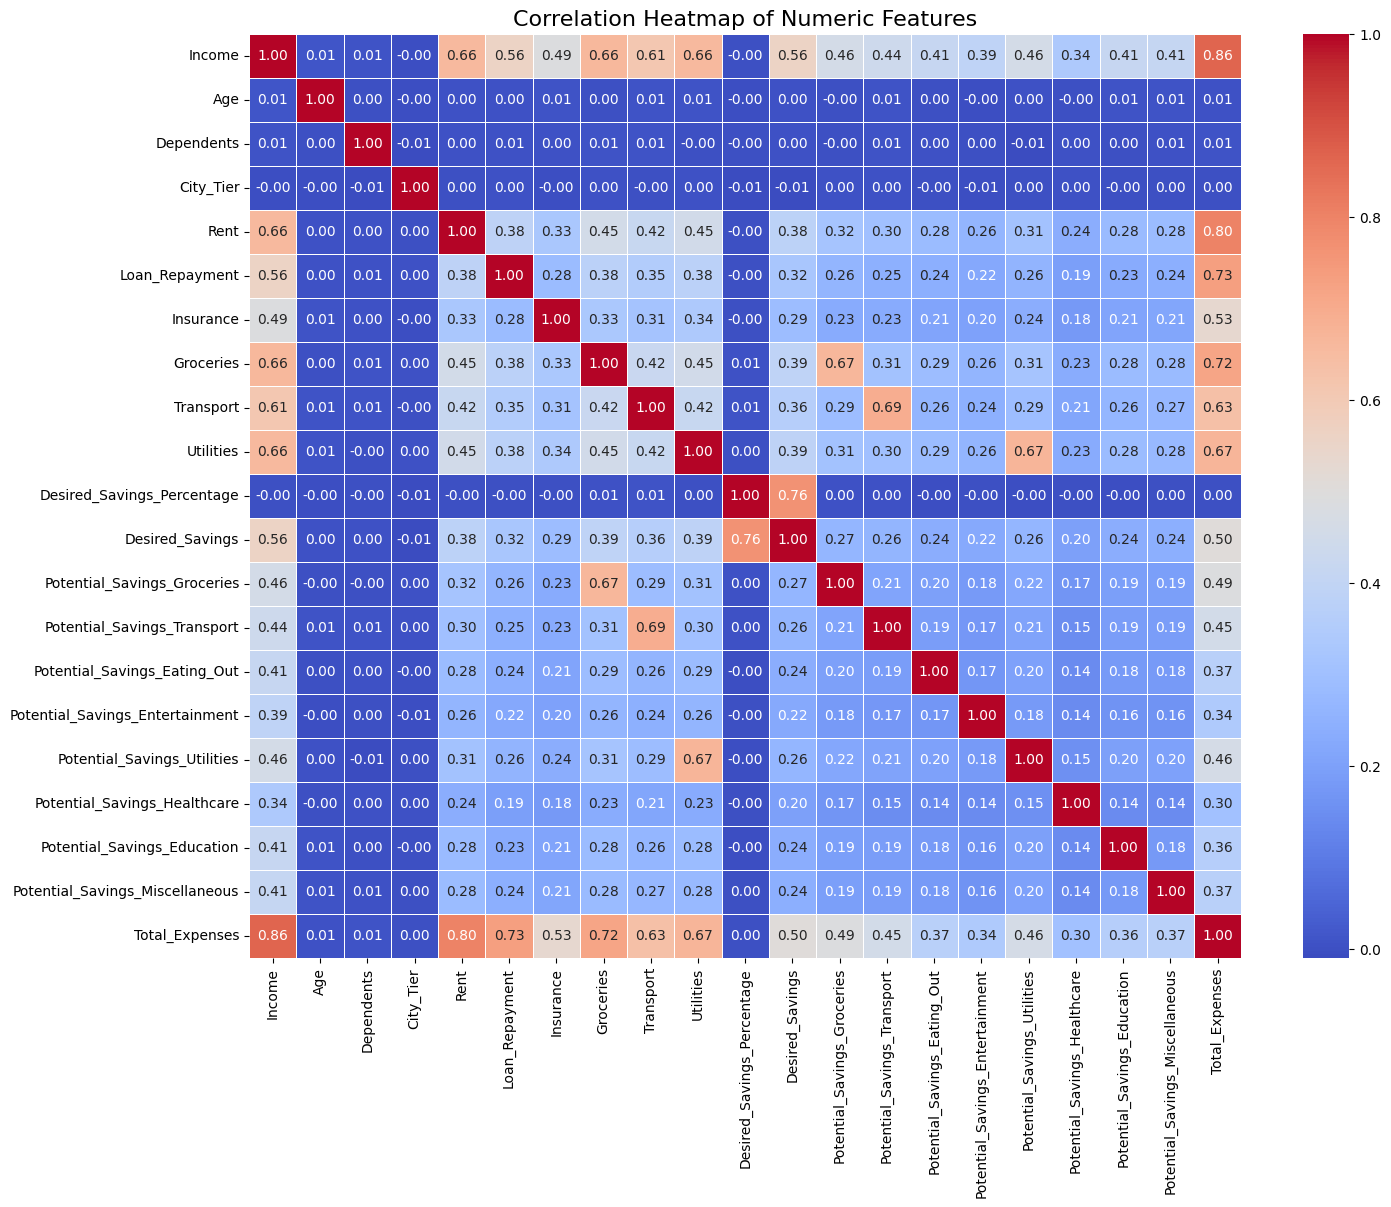

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [ ]:
# List of columns to drop
cols_to_drop = ['Utilities', 'Rent', 'Loan_Repayment', 'Insurance', 'Transport', 'Groceries']

# Drop them from the dataset
df.drop(columns=cols_to_drop, inplace=True)

# Confirm the result
print("✅ Dropped columns:", cols_to_drop)
print("📦 New shape of dataset:", df.shape)

✅ Dropped columns: ['Utilities', 'Rent', 'Loan_Repayment', 'Insurance', 'Transport', 'Groceries']
📦 New shape of dataset: (51011, 16)


In [ ]:
df.shape

(51011, 16)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with missing values for VIF calculation
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant column
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF
vif_data = []
for i in range(X.shape[1]):
    try:
        vif_score = variance_inflation_factor(X.values, i)
    except:
        vif_score = np.inf
    vif_data.append(vif_score)

# Step 5: Create VIF DataFrame
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif_data
}).sort_values(by='VIF', ascending=False)

# Step 6: Optional: Replace inf with readable symbol
vif_df['VIF'] = vif_df['VIF'].replace(np.inf, '∞')

# Show the result
print(vif_df)


                            Feature         VIF
0                             const  103.626394
6                   Desired_Savings   10.130201
1                            Income    7.172514
5        Desired_Savings_Percentage    6.920464
15                   Total_Expenses    4.332403
7       Potential_Savings_Groceries    1.322738
11      Potential_Savings_Utilities    1.293234
8       Potential_Savings_Transport    1.273655
9      Potential_Savings_Eating_Out    1.209557
13      Potential_Savings_Education    1.207550
14  Potential_Savings_Miscellaneous    1.206220
10  Potential_Savings_Entertainment    1.178787
12     Potential_Savings_Healthcare    1.131429
4                         City_Tier    1.000344
3                        Dependents    1.000331
2                               Age    1.000317


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Drop missing values (VIF needs complete data)
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant for intercept
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF for each column
vif_data = []
for i in range(X.shape[1]):
    try:
        vif_score = variance_inflation_factor(X.values, i)
    except:
        vif_score = np.inf
    vif_data.append(vif_score)

# Step 5: Store VIF values in a DataFrame
vif_df = pd.DataFrame({
    "Feature": X.columns,
    "VIF": vif_data
})

# Step 6: Filter out features with VIF > 10, excluding the constant
high_vif_features = vif_df[(vif_df['VIF'] > 10) & (vif_df['Feature'] != 'const')]['Feature'].tolist()

print("🔴 Dropping high VIF features:", high_vif_features)

# Step 7: Drop from original df (only if they exist)
df.drop(columns=high_vif_features, inplace=True)

# Step 8: Show updated DataFrame info
print("✅ Columns dropped. Updated shape of df:", df.shape)


🔴 Dropping high VIF features: ['Desired_Savings']
✅ Columns dropped. Updated shape of df: (51011, 15)


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with missing values for VIF calculation
numeric_df_clean = numeric_df.dropna()

# Step 3: Add constant column
X = add_constant(numeric_df_clean)

# Step 4: Calculate VIF
vif_data = []
for i in range(X.shape[1]):
    try:
        vif_score = variance_inflation_factor(X.values, i)
    except:
        vif_score = np.inf
    vif_data.append(vif_score)

# Step 5: Create VIF DataFrame
vif_df = pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif_data
}).sort_values(by='VIF', ascending=False)

# Step 6: Optional: Replace inf with readable symbol
vif_df['VIF'] = vif_df['VIF'].replace(np.inf, '∞')

# Show the result
print(vif_df)


                            Feature        VIF
0                             const  49.684688
1                            Income   4.782576
14                   Total_Expenses   4.288448
6       Potential_Savings_Groceries   1.322722
10      Potential_Savings_Utilities   1.292853
7       Potential_Savings_Transport   1.273415
8      Potential_Savings_Eating_Out   1.209098
12      Potential_Savings_Education   1.206759
13  Potential_Savings_Miscellaneous   1.205560
9   Potential_Savings_Entertainment   1.178395
11     Potential_Savings_Healthcare   1.131001
3                        Dependents   1.000331
2                               Age   1.000315
4                         City_Tier   1.000276
5        Desired_Savings_Percentage   1.000145


In [ ]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.569836   46           1   Business          1   
1  48340.828386   21           1   Salaried          1   
2  57772.262457   25           0   Salaried          2   
3  68276.358277   55           0   Salaried          1   
4  47190.159503   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                    0.188454                  1278.635947   
1                    0.083077                   317.751545   
2                    0.181458                   909.169324   
3                    0.069227                   772.340602   
4                    0.178170                   720.856550   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                   306.490082                    150.188151   
1                   189.509425                    391.868349   
2                   448.337949                    270.973509   
3                   395.458993                    557.188560   
4                   689.550082                    330.012373   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                       493.636673                   120.426749   
1                       189.860863                   486.525435   
2                       455.452601                   301.928774   
3                       584.194632                  1035.830627   
4                       116.536741                   393.672727   

   Potential_Savings_Healthcare  Potential_Savings_Education  \
0                    584.853554                   252.221591   
1                    304.888699                   288.870728   
2                    293.257586                    97.788042   
3                    609.494826                   166.961144   
4                    109.262528                   288.255678   

   Potential_Savings_Miscellaneous  Total_Expenses  
0                       115.618650    33417.790602  
1                       275.758668    34921.417559  
2                        95.327148    35726.036579  
3                       164.061120    40507.641166  
4                        53.677966    32802.216387

In [ ]:
df = df.round(3)

In [ ]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      395.459                       557.189   
4                      689.550                       330.012   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   

   Potential_Savings_Healthcare  Potential_Savings_Education  \
0                       584.854                      252.222   
1                       304.889                      288.871   
2                       293.258                       97.788   
3                       609.495                      166.961   
4                       109.263                      288.256   

   Potential_Savings_Miscellaneous  Total_Expenses  
0                          115.619       33417.791  
1                          275.759       34921.418  
2                           95.327       35726.037  
3                          164.061       40507.641  
4                           53.678       32802.216

 ## Find Highly Correlated Pairs (> 0.8 or < -0.8)

In [ ]:
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # Exclude perfect self-correlation
high_corr[high_corr > 0.8]

Total_Expenses  Income            0.862110
Income          Total_Expenses    0.862110
Total_Expenses  Rent              0.801554
Rent            Total_Expenses    0.801554
dtype: float64

In [ ]:
df.drop(['Potential_Savings_Healthcare'], axis=1, inplace=True)

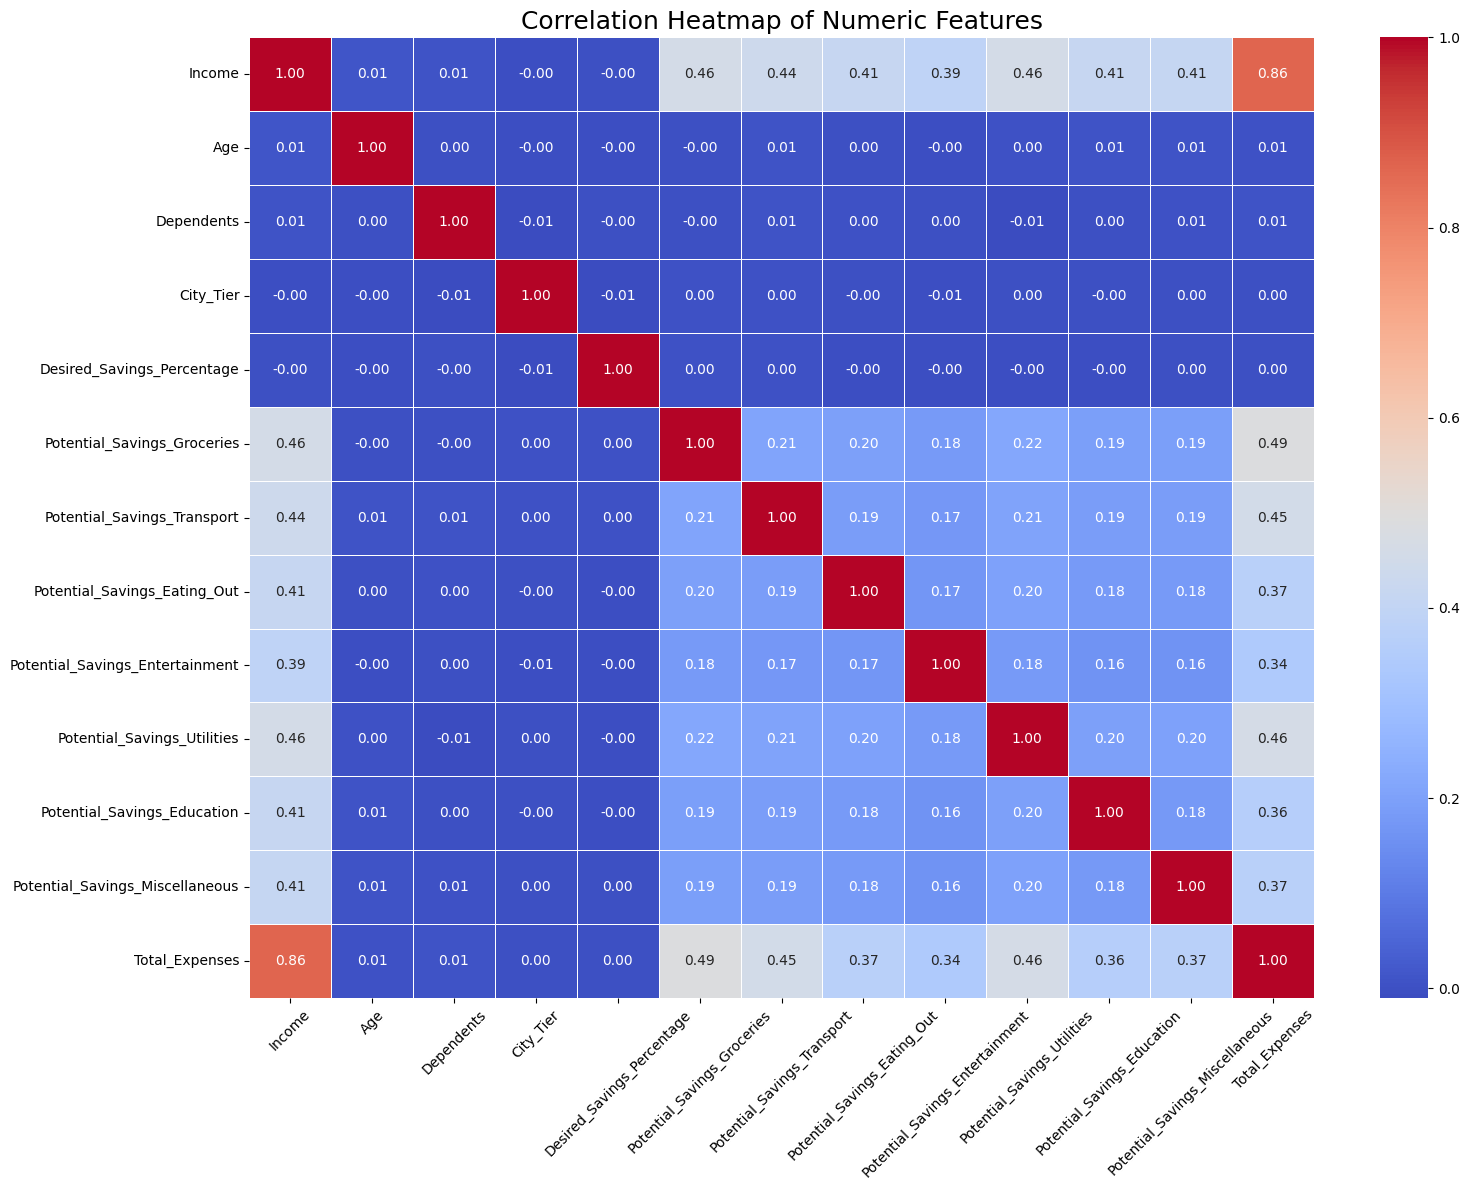

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Step 3: Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation values
    fmt=".2f",            # format to 2 decimal places
    cmap="coolwarm",      # color palette
    linewidths=0.5,       # lines between cells
    cbar=True             # show color bar
)

# Step 4: Title and display
plt.title("Correlation Heatmap of Numeric Features", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Step 2: Unstack and sort the absolute correlation values
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Step 3: Remove self-correlations (e.g., Age with Age)
filtered_corr = corr_pairs[corr_pairs < 1]

# Step 4: Drop duplicate pairs (A-B and B-A)
filtered_corr = filtered_corr[~filtered_corr.index.duplicated()]

# Step 5: Show top 10 highest correlation pairs
print("🔝 Top 10 Most Correlated Feature Pairs:\n")
top_10 = filtered_corr.head(10)
for (feature1, feature2), corr_value in top_10.items():
    print(f"{feature1} ↔ {feature2} : {corr_value:.2f}")


🔝 Top 10 Most Correlated Feature Pairs:

Income ↔ Total_Expenses : 0.86
Total_Expenses ↔ Income : 0.86
Total_Expenses ↔ Potential_Savings_Groceries : 0.49
Potential_Savings_Groceries ↔ Total_Expenses : 0.49
Potential_Savings_Utilities ↔ Total_Expenses : 0.46
Total_Expenses ↔ Potential_Savings_Utilities : 0.46
Potential_Savings_Utilities ↔ Income : 0.46
Income ↔ Potential_Savings_Utilities : 0.46
Income ↔ Potential_Savings_Groceries : 0.46
Potential_Savings_Groceries ↔ Income : 0.46


# Outliers

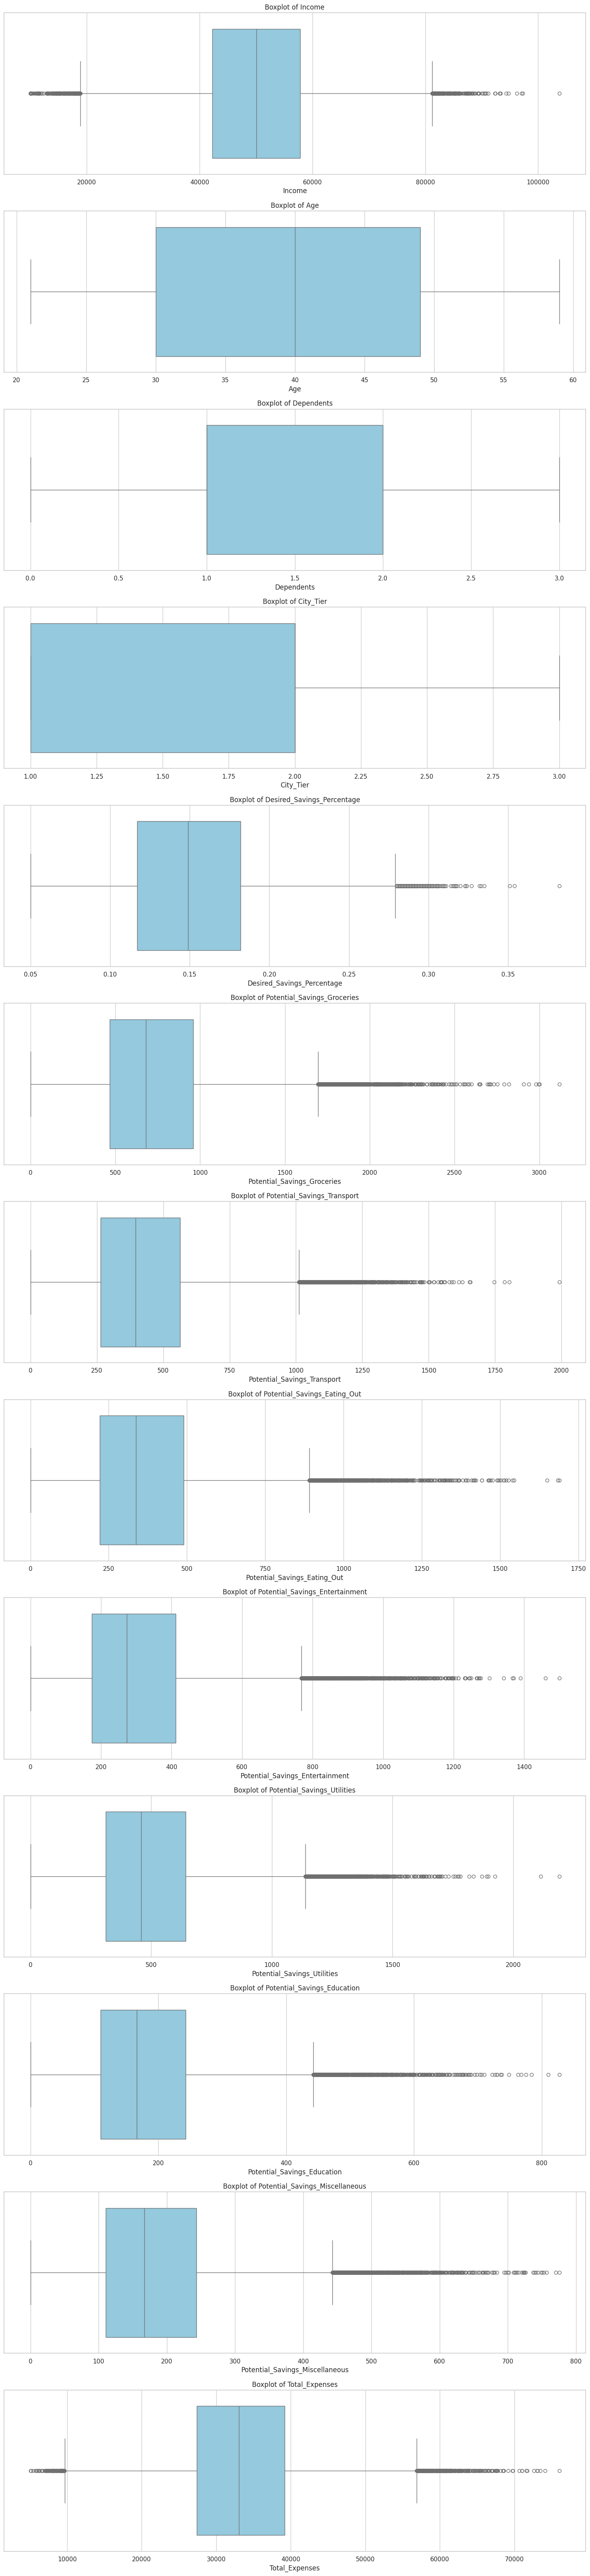

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Loop through all numeric columns and create boxplots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting
plt.figure(figsize=(15, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to calculate outlier percentage using IQR method
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return round(100 * len(outliers) / len(series), 2)

# Apply function to all numeric columns
outlier_percentages = df[numeric_cols].apply(outlier_percentage)

# Display results
print("Percentage of outliers in each numerical column:")
print(outlier_percentages)

Percentage of outliers in each numerical column:
Income                             0.92
Age                                0.00
Dependents                         0.00
City_Tier                          0.00
Desired_Savings_Percentage         0.44
Potential_Savings_Groceries        2.00
Potential_Savings_Transport        2.13
Potential_Savings_Eating_Out       2.22
Potential_Savings_Entertainment    2.64
Potential_Savings_Utilities        1.85
Potential_Savings_Education        2.25
Potential_Savings_Miscellaneous    2.35
Total_Expenses                     1.07
dtype: float64


In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column to find outlier percentage
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    # Calculate percentage
    percentage = (len(outliers) / len(df)) * 100

    print(f"{col}: {percentage:.2f}% outliers")

Income: 0.92% outliers
Age: 0.00% outliers
Dependents: 0.00% outliers
City_Tier: 0.00% outliers
Desired_Savings_Percentage: 0.44% outliers
Potential_Savings_Groceries: 2.00% outliers
Potential_Savings_Transport: 2.13% outliers
Potential_Savings_Eating_Out: 2.22% outliers
Potential_Savings_Entertainment: 2.64% outliers
Potential_Savings_Utilities: 1.85% outliers
Potential_Savings_Education: 2.25% outliers
Potential_Savings_Miscellaneous: 2.35% outliers
Total_Expenses: 1.07% outliers


In [ ]:
# Select only numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Cap outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the values
    df[col] = df[col].clip(lower=lower, upper=upper)

# Done: DataFrame `df` now has capped values
print("Outliers have been capped using IQR method.")

Outliers have been capped using IQR method.


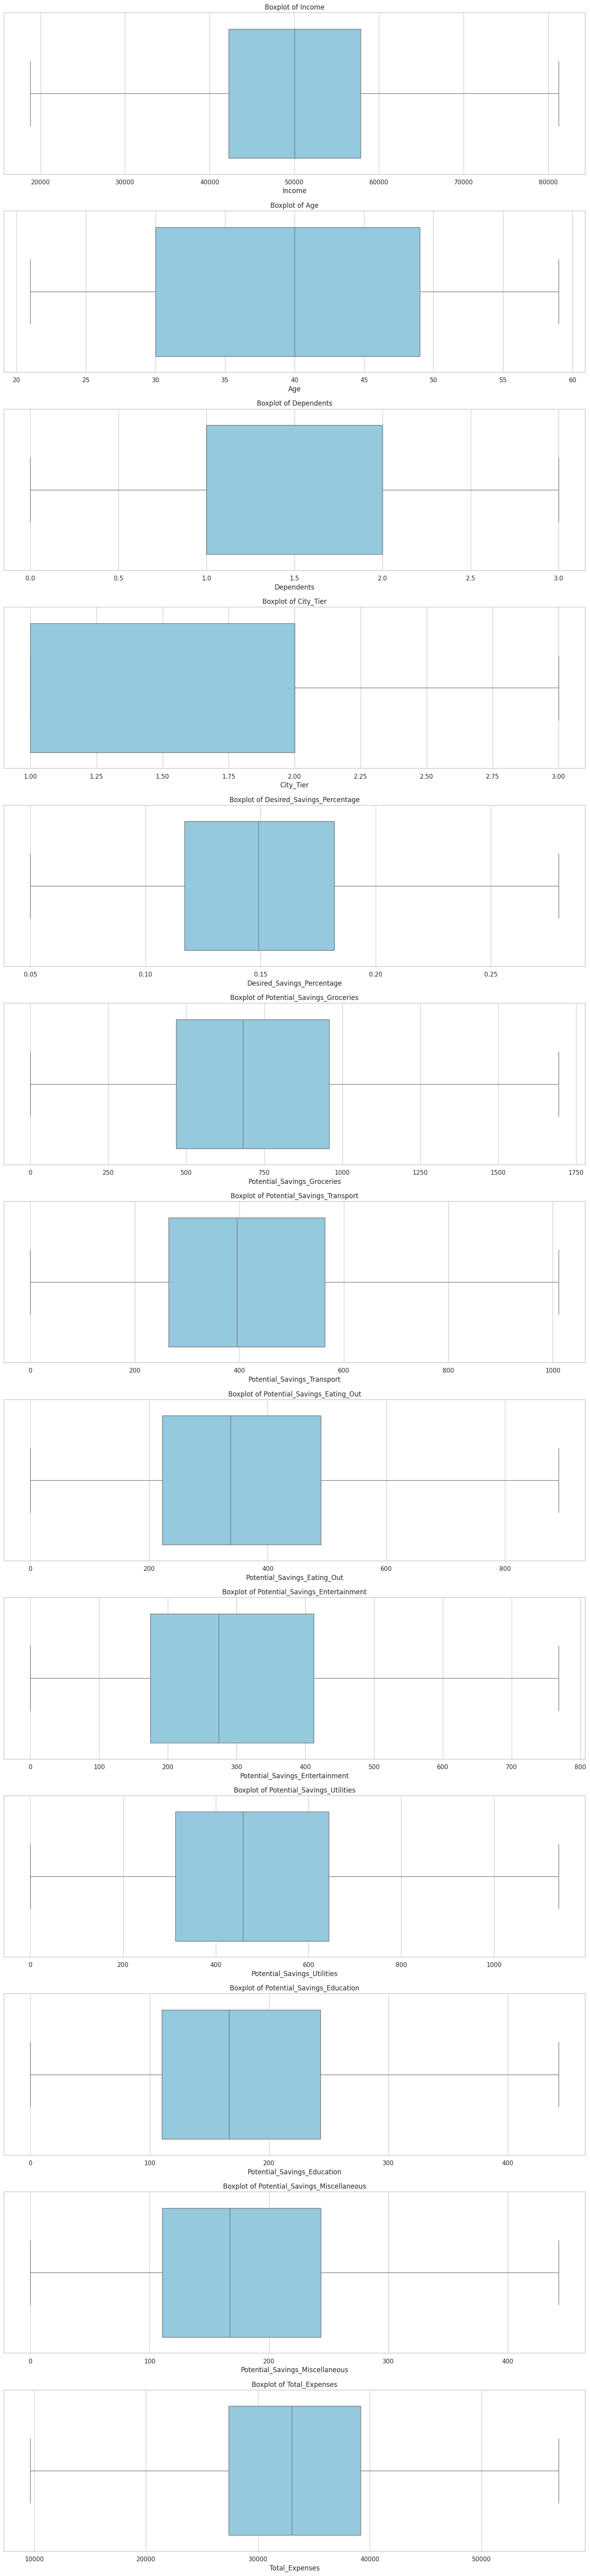

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Loop through all numeric columns and create boxplots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting
plt.figure(figsize=(15, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier',
       'Desired_Savings_Percentage', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
       'Total_Expenses'],
      dtype='object')

In [ ]:
df.shape

(51011, 14)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Drop rows with missing values (VIF needs complete data)
numeric_df_cleaned = numeric_df.dropna()

# Step 3: Add constant for intercept
X = add_constant(numeric_df_cleaned)

# Step 4: Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 5: Display sorted VIF values
vif.sort_values(by="VIF", ascending=False)


Feature        VIF
0                             const  50.139231
1                            Income   4.683767
13                   Total_Expenses   4.294476
6       Potential_Savings_Groceries   1.317506
10      Potential_Savings_Utilities   1.291543
7       Potential_Savings_Transport   1.270178
8      Potential_Savings_Eating_Out   1.206398
11      Potential_Savings_Education   1.205052
12  Potential_Savings_Miscellaneous   1.203613
9   Potential_Savings_Entertainment   1.176519
3                        Dependents   1.000333
2                               Age   1.000296
4                         City_Tier   1.000261
5        Desired_Savings_Percentage   1.000151

In [ ]:
df.head(10)

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   
5  50039.535   24           1   Business          2   
6  68950.554   35           0   Business          2   
7  59209.217   28           1   Business          2   
8  44366.307   22           2   Business          2   
9  56510.721   39           1   Business          3   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   
5                       0.199                      601.535   
6                       0.103                      820.197   
7                       0.138                      594.714   
8                       0.144                      681.803   
9                       0.140                      607.509   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      395.459                       557.189   
4                      689.550                       330.012   
5                      503.075                       463.926   
6                      966.929                       669.557   
7                      426.302                       344.720   
8                      606.175                       180.518   
9                      127.807                       246.574   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   
5                          251.229                      544.612   
6                          273.812                      469.536   
7                           93.434                      712.664   
8                          296.744                      265.416   
9                          106.988                      781.014   

   Potential_Savings_Education  Potential_Savings_Miscellaneous  \
0                      252.222                          115.619   
1                      288.871                          275.759   
2                       97.788                           95.327   
3                      166.961                          164.061   
4                      288.256                           53.678   
5                      256.162                          194.573   
6                      203.978                          420.759   
7                      104.423                           61.202   
8                      233.110                          167.209   
9                      184.701                          304.019   

   Total_Expenses  
0       33417.791  
1       34921.418  
2       35726.037  
3       40507.641  
4       32802.216  
5       25597.291  
6       45714.571  
7       43681.524  
8       29432.720  
9       31823.793

In [ ]:
df.tail(10)

Income  Age  Dependents  Occupation  City_Tier  \
51001  19416.78200   24           1  Freelancer          2   
51002  40092.07900   42           0    Salaried          3   
51003  70825.37200   42           0    Salaried          2   
51004  63736.51700   37           3    Salaried          1   
51005  61820.14200   43           1  Freelancer          1   
51006  50039.53500   55           0    Salaried          3   
51007  69811.14300   49           2  Freelancer          2   
51008  53088.32800   23           0  Freelancer          1   
51009  58278.11900   32           3    Salaried          2   
51010  81231.72725   45           2    Business          1   

       Desired_Savings_Percentage  Potential_Savings_Groceries  \
51001                       0.092                      196.921   
51002                       0.070                      394.435   
51003                       0.235                     1160.289   
51004                       0.215                     1440.322   
51005                       0.190                      674.728   
51006                       0.147                      653.783   
51007                       0.140                      947.721   
51008                       0.084                      511.753   
51009                       0.135                      563.287   
51010                       0.190                      940.648   

       Potential_Savings_Transport  Potential_Savings_Eating_Out  \
51001                     57.27000                        98.230   
51002                    576.98800                       337.353   
51003                   1011.27825                       336.598   
51004                    502.70600                        17.309   
51005                    723.26400                       506.588   
51006                    293.82000                       200.993   
51007                    538.11900                       719.652   
51008                    251.46700                       544.271   
51009                    773.24600                       402.564   
51010                    725.87600                       767.593   

       Potential_Savings_Entertainment  Potential_Savings_Utilities  \
51001                         68.08800                      154.761   
51002                        384.99800                      686.957   
51003                        536.55400                      644.448   
51004                        580.09700                      773.129   
51005                        184.52800                      789.737   
51006                         84.65200                      311.277   
51007                        768.54825                      361.021   
51008                        151.12100                      795.031   
51009                        541.99000                      541.922   
51010                         93.79900                      458.246   

       Potential_Savings_Education  Potential_Savings_Miscellaneous  \
51001                       31.670                          125.963   
51002                      257.722                           33.231   
51003                      220.077                          278.172   
51004                       89.124                          279.684   
51005                      166.592                          209.647   
51006                      205.590                           64.968   
51007                      361.532                           82.963   
51008                      289.213                          145.615   
51009                      234.837                          325.620   
51010                      166.592                          167.209   

       Total_Expenses  
51001       10775.057  
51002       22966.371  
51003       41095.554  
51004       40028.180  
51005       49469.131  
51006       39387.789  
51007       52805.131  
51008       42047.344  
51009       46094.987  
51010       54243.637

# Step:03- EDA performaning

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define numerical_features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Prepare data for VIF
X = df[numerical_features].dropna()  # Drop missing values
X = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display result
print(vif_data)


                            Feature        VIF
0                             const  50.139231
1                            Income   4.683767
2                               Age   1.000296
3                        Dependents   1.000333
4                         City_Tier   1.000261
5        Desired_Savings_Percentage   1.000151
6       Potential_Savings_Groceries   1.317506
7       Potential_Savings_Transport   1.270178
8      Potential_Savings_Eating_Out   1.206398
9   Potential_Savings_Entertainment   1.176519
10      Potential_Savings_Utilities   1.291543
11      Potential_Savings_Education   1.205052
12  Potential_Savings_Miscellaneous   1.203613
13                   Total_Expenses   4.294476


In [ ]:
print("📊 Basic Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

print("\n📐 Summary Statistics:")
print(df.describe())

📊 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51011 entries, 0 to 51010
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           51011 non-null  float64
 1   Age                              51011 non-null  int64  
 2   Dependents                       51011 non-null  int64  
 3   Occupation                       51011 non-null  object 
 4   City_Tier                        51011 non-null  int64  
 5   Desired_Savings_Percentage       51011 non-null  float64
 6   Potential_Savings_Groceries      51011 non-null  float64
 7   Potential_Savings_Transport      51011 non-null  float64
 8   Potential_Savings_Eating_Out     51011 non-null  float64
 9   Potential_Savings_Entertainment  51011 non-null  float64
 10  Potential_Savings_Utilities      51011 non-null  float64
 11  Potential_Savings_Education      51011 non-null  float64
 12  Pote

# UNIVARIATE ANALYSIS(Feature Distributions)

## Numerical Columns

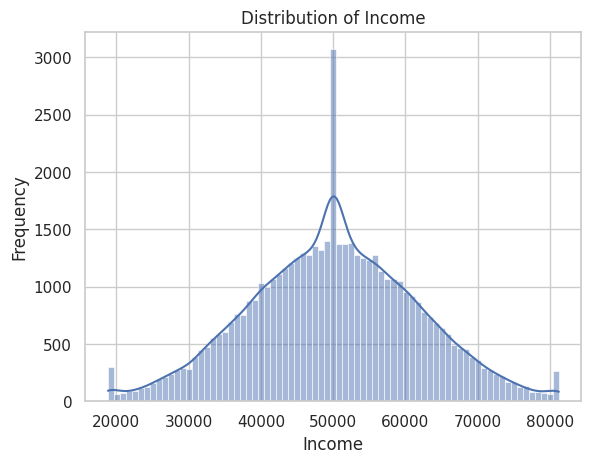

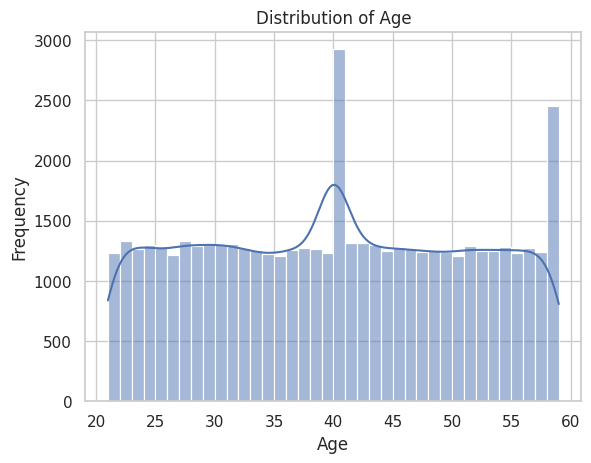

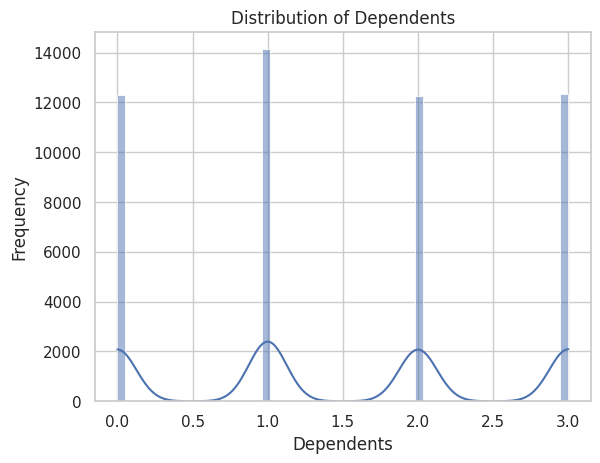

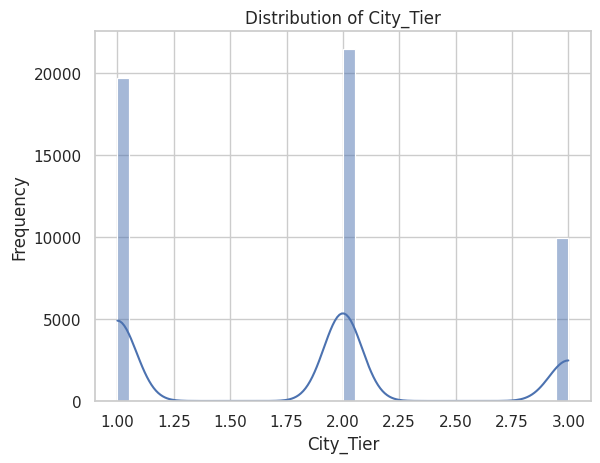

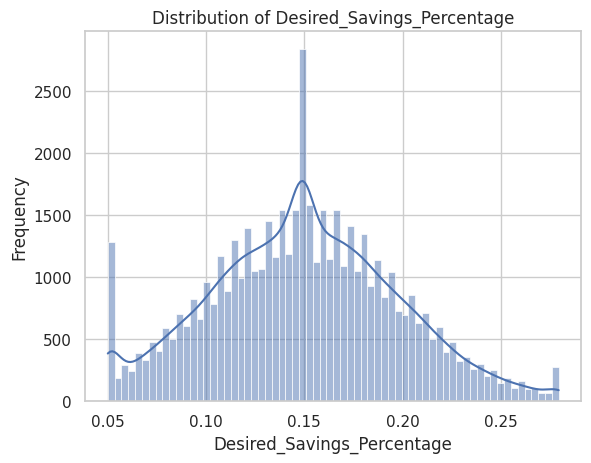

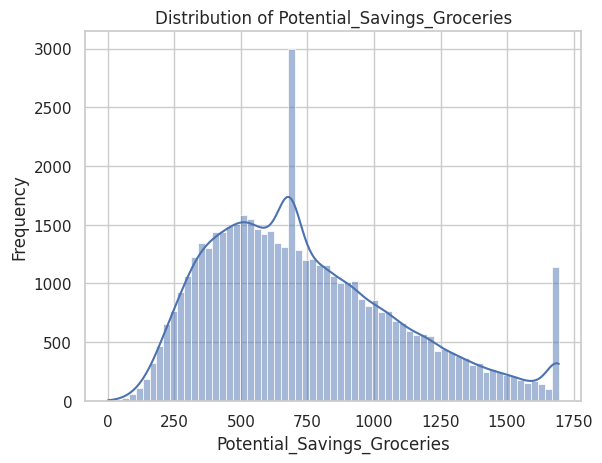

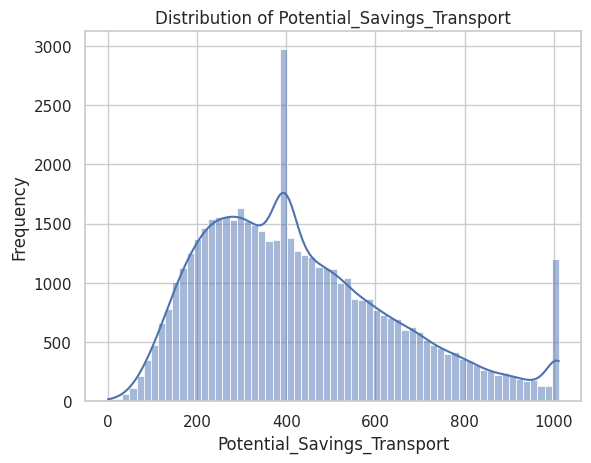

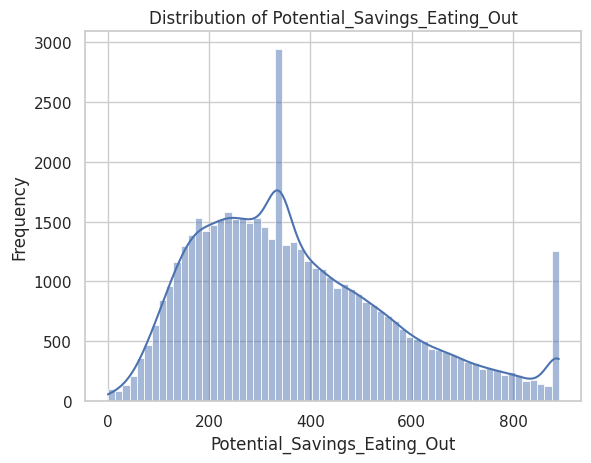

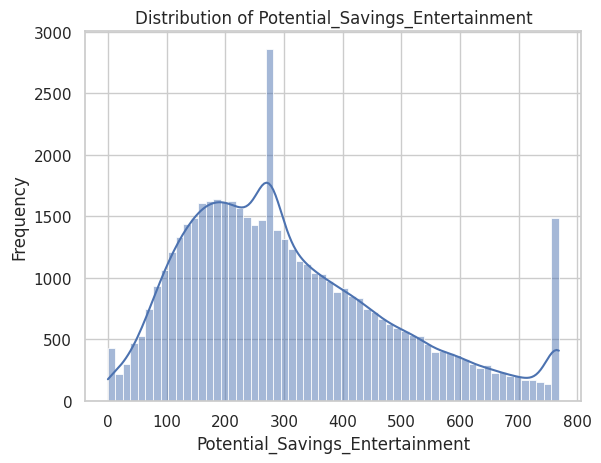

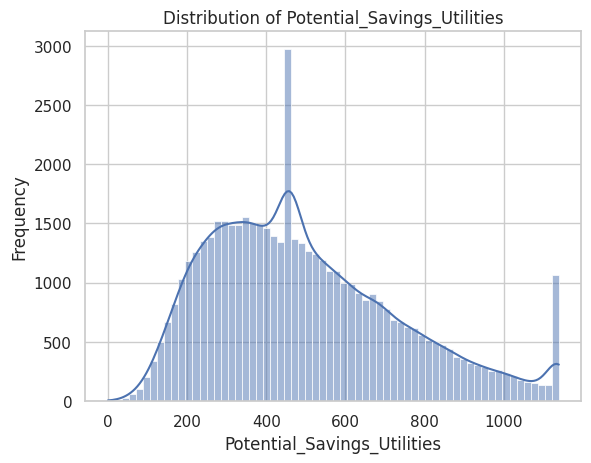

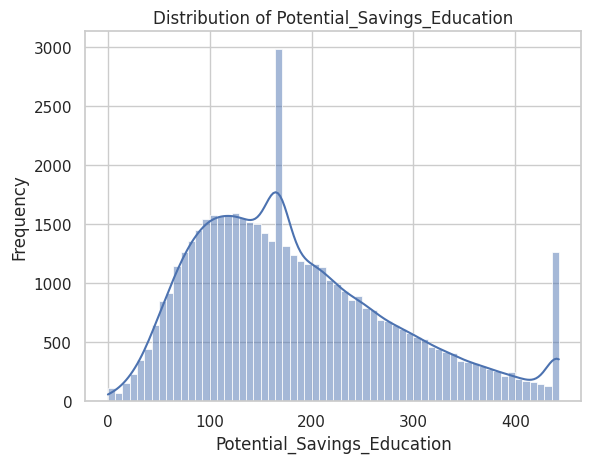

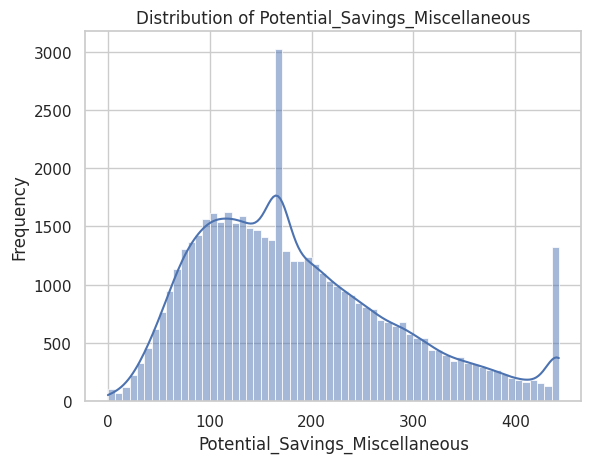

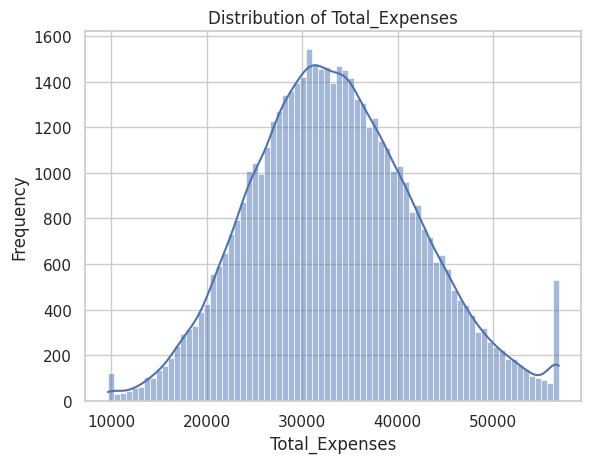

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Categorical Columns

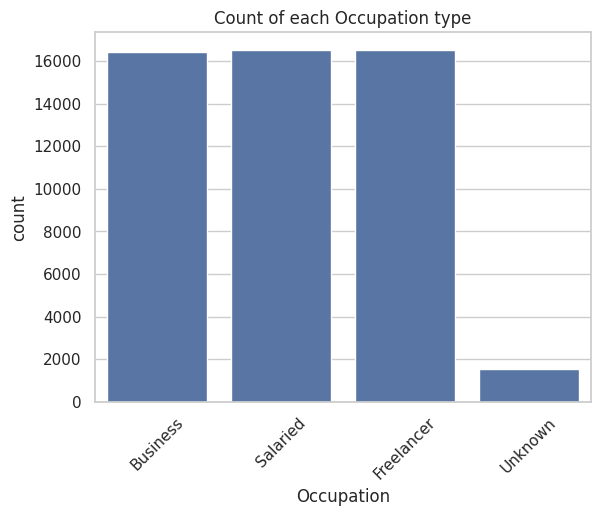

In [ ]:
# If 'Occupation' is your only categorical column
plt.figure()
sns.countplot(x='Occupation', data=df)
plt.title("Count of each Occupation type")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis (Feature vs. Target)

## Numeric Feature vs. Target

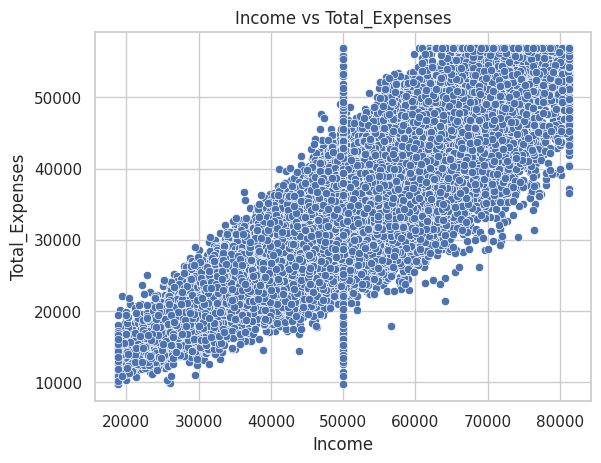

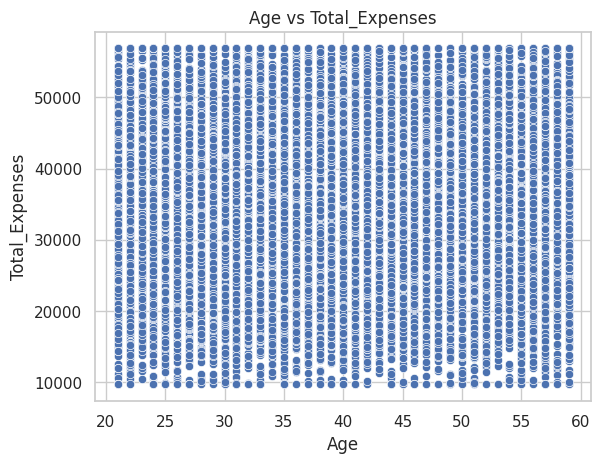

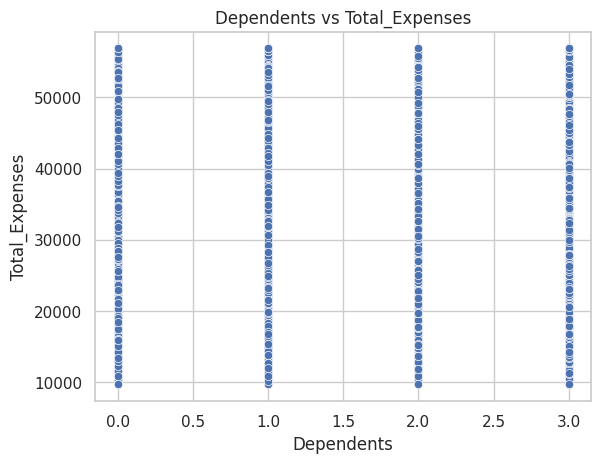

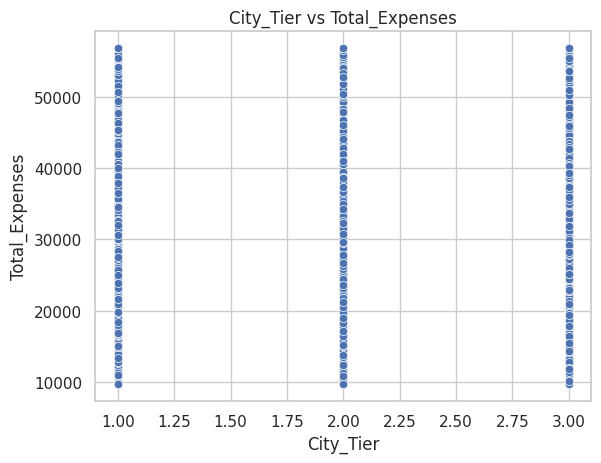

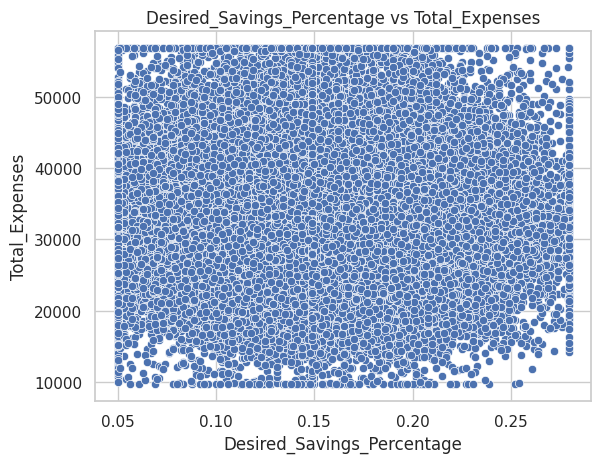

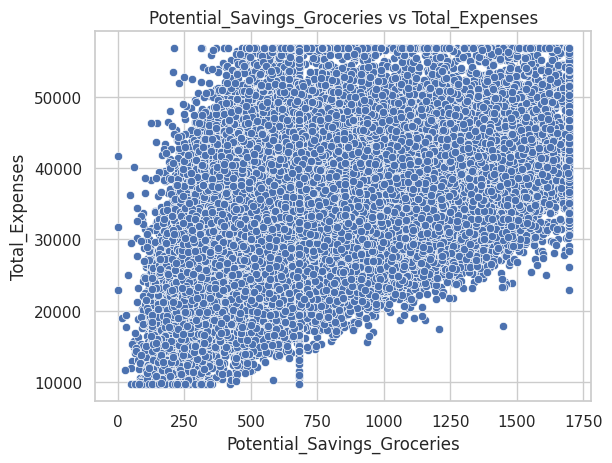

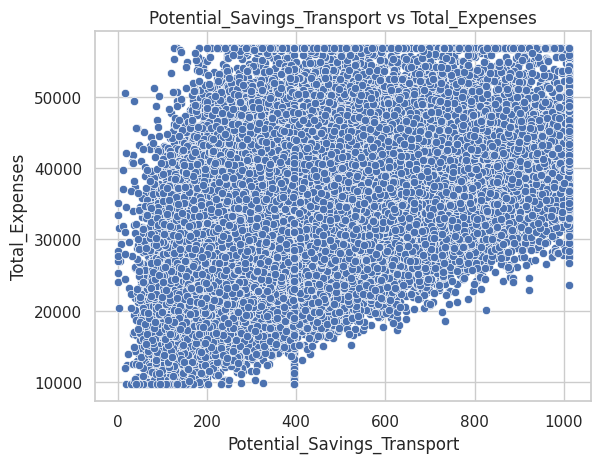

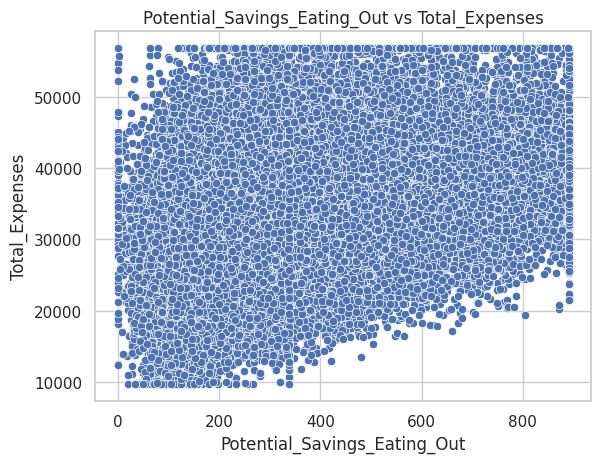

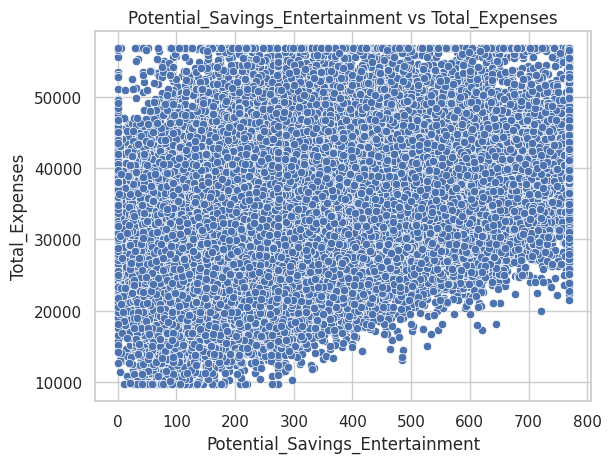

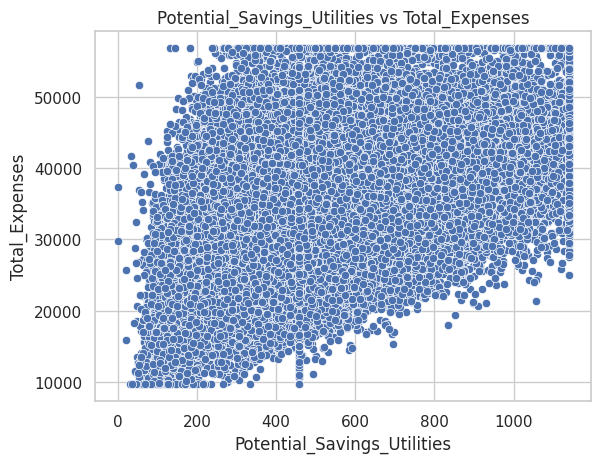

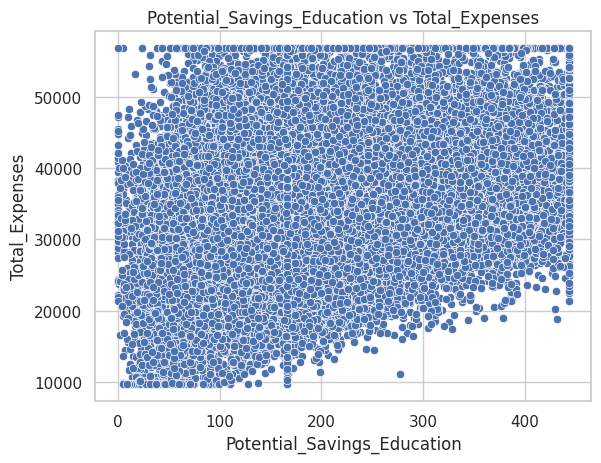

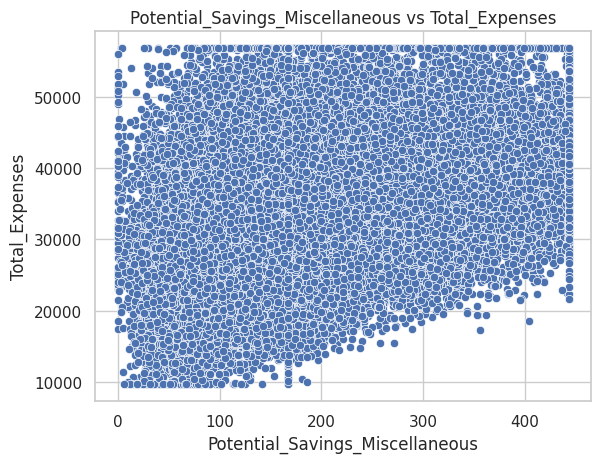

In [ ]:
for col in df.select_dtypes(include=['int64', 'float64']).drop('Total_Expenses', axis=1).columns:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Total_Expenses'])
    plt.title(f"{col} vs Total_Expenses")
    plt.show()


## Categorical vs. Target

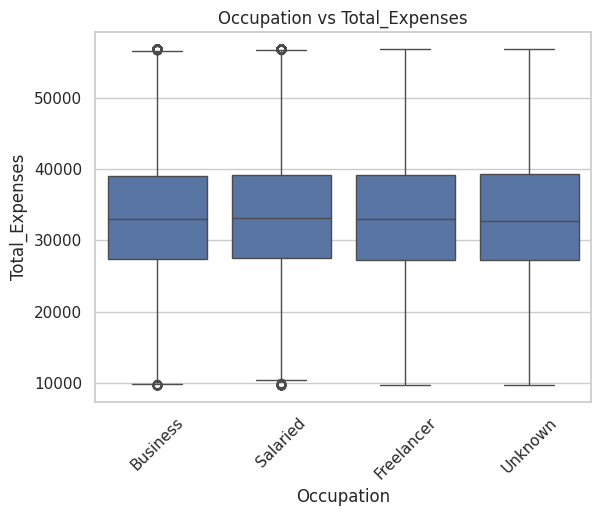

In [ ]:
plt.figure()
sns.boxplot(x='Occupation', y='Total_Expenses', data=df)
plt.title("Occupation vs Total_Expenses")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap

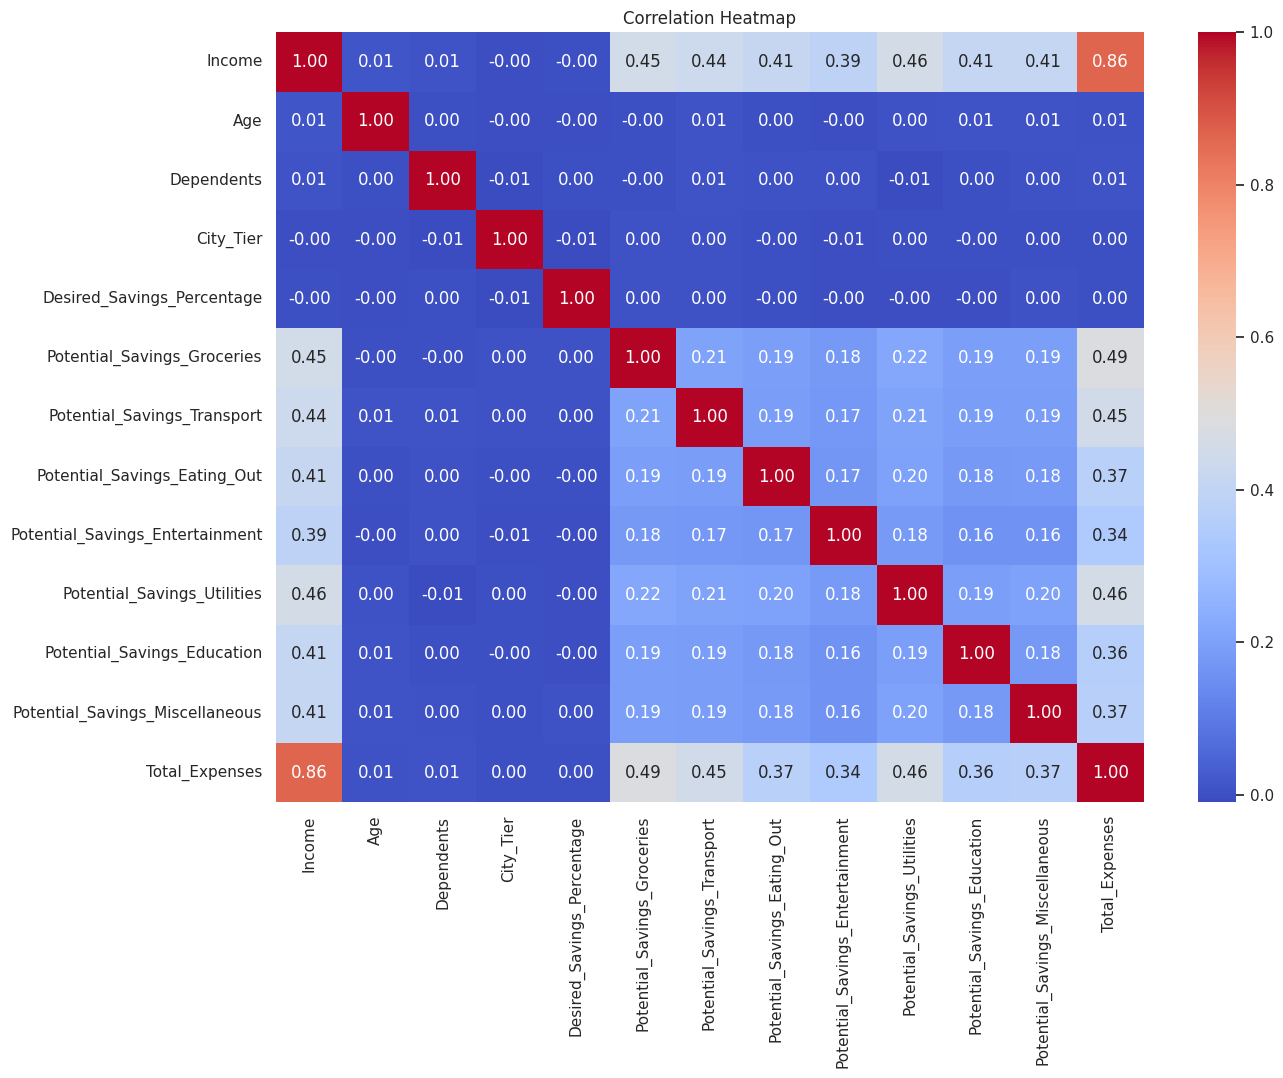

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Skewness & Outliers


📐 Skewness of numeric columns:
Potential_Savings_Entertainment    0.768954
Potential_Savings_Miscellaneous    0.751259
Potential_Savings_Education        0.744285
Potential_Savings_Eating_Out       0.737227
Potential_Savings_Transport        0.731315
Potential_Savings_Utilities        0.707390
Potential_Savings_Groceries        0.707113
City_Tier                          0.317835
Total_Expenses                     0.212735
Desired_Savings_Percentage         0.111521
Dependents                         0.044792
Age                                0.008473
Income                            -0.005553
dtype: float64


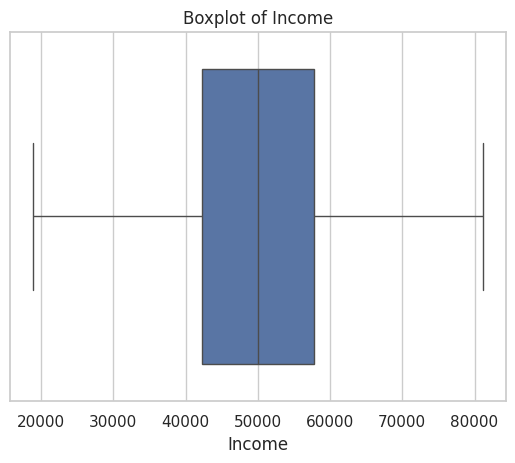

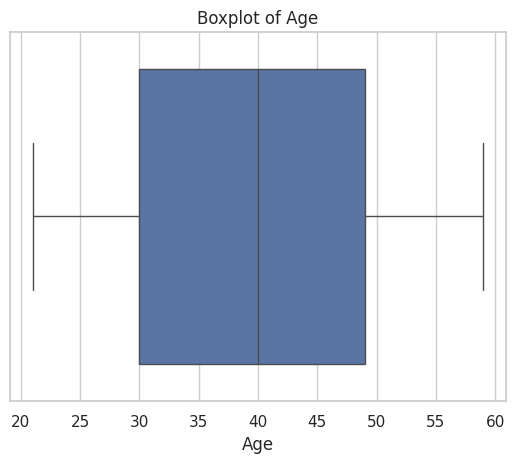

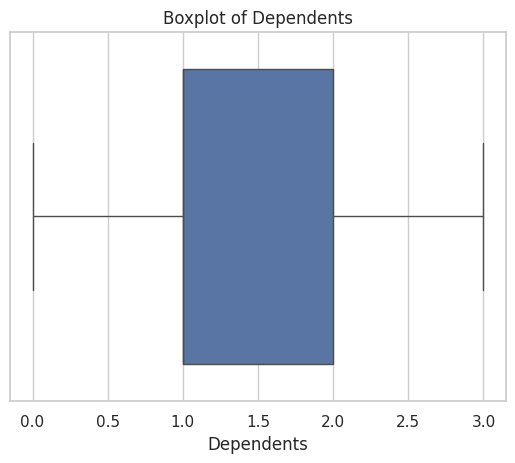

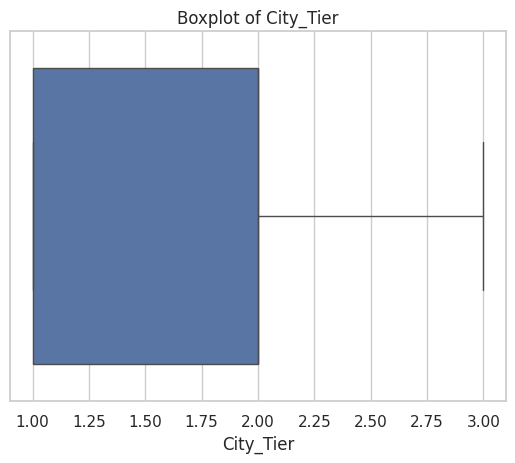

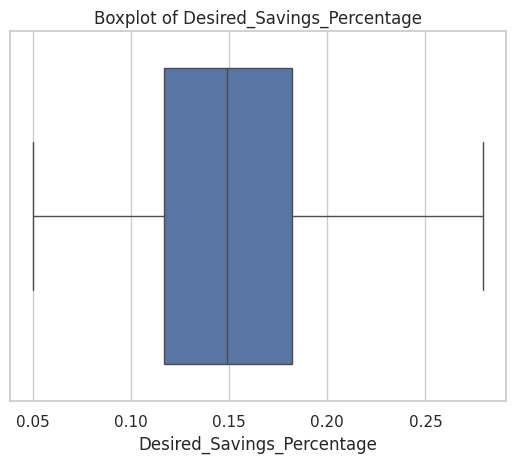

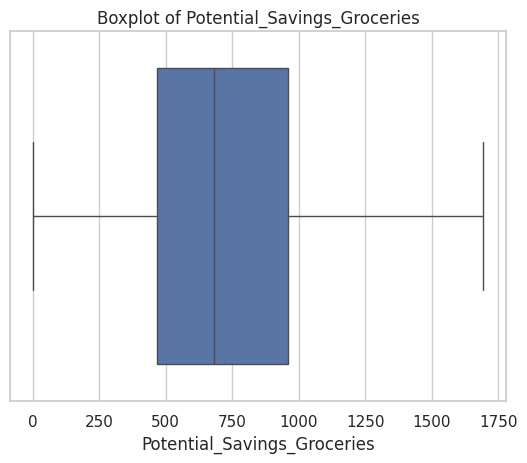

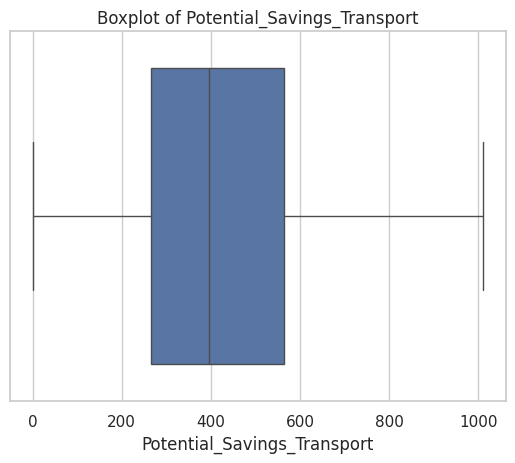

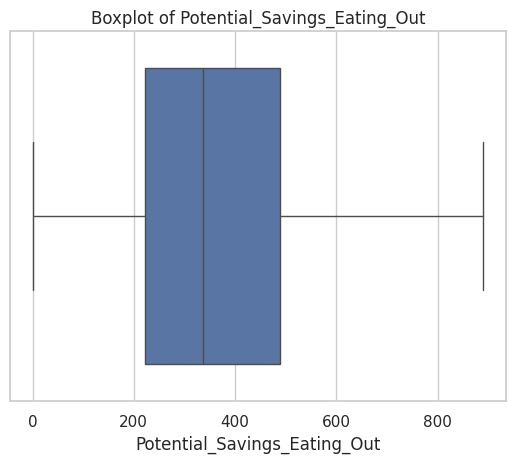

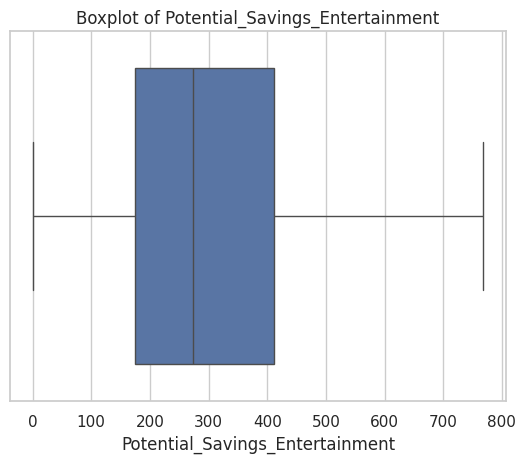

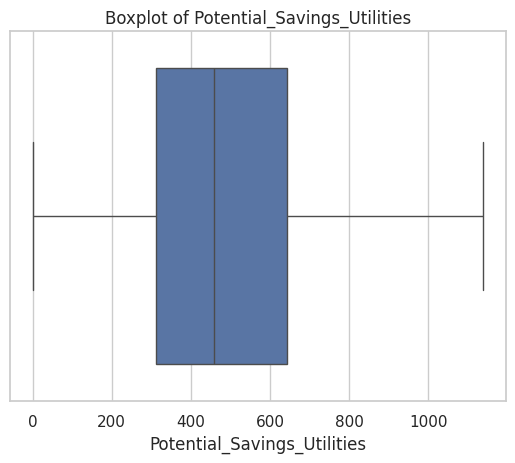

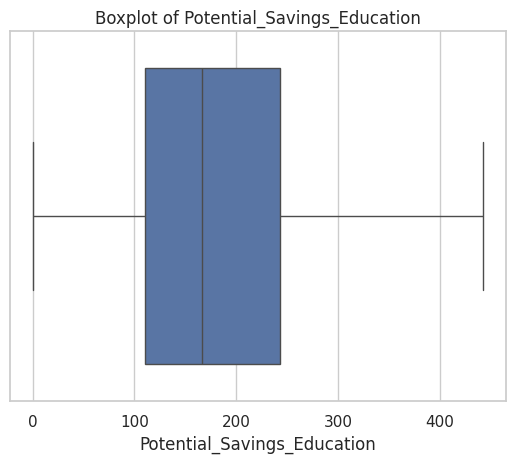

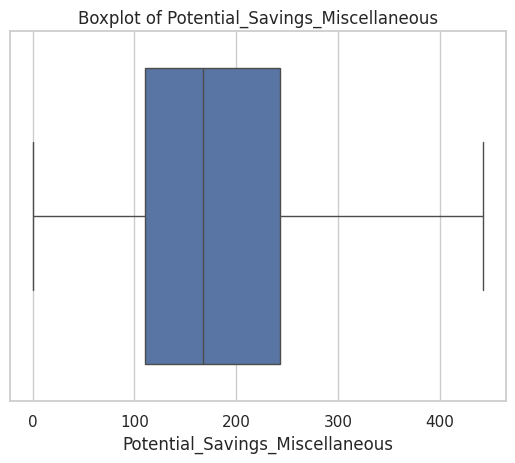

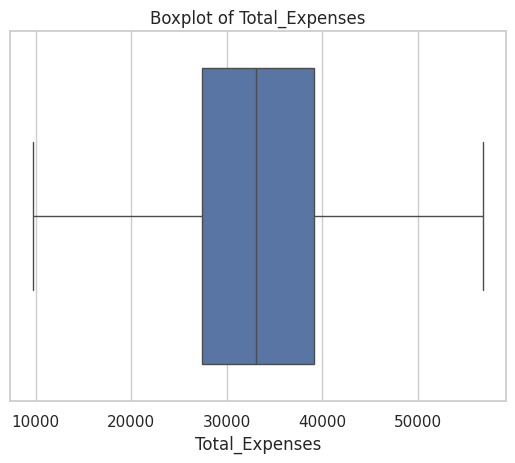

In [ ]:
from scipy.stats import skew

print("\n📐 Skewness of numeric columns:")
print(df[num_cols].skew().sort_values(ascending=False))

# Boxplot to detect outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 04- Inferential Stats

## 1.T-Test or ANOVA

## Q: Is Total_Expenses significantly different across Occupations?

In [ ]:
import scipy.stats as stats

# Get unique occupation groups
groups = [group["Total_Expenses"].dropna() for name, group in df.groupby("Occupation")]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ There is a statistically significant difference between occupations.")
else:
    print("❌ No significant difference between occupation groups.")


ANOVA F-statistic: 1.90
P-value: 0.12770
❌ No significant difference between occupation groups.


## 2. Confidence Interval for Mean Desired Savings %

In [ ]:
import numpy as np
import scipy.stats as stats

mean = df["Desired_Savings_Percentage"].mean()
std_err = stats.sem(df["Desired_Savings_Percentage"].dropna())
ci = stats.t.interval(0.95, len(df["Desired_Savings_Percentage"])-1, loc=mean, scale=std_err)

print(f"📏 95% Confidence Interval for Desired Savings %: {ci[0]:.2f} to {ci[1]:.2f}")


📏 95% Confidence Interval for Desired Savings %: 0.15 to 0.15


## 3. Significance of Correlation

In [ ]:
# Find correlation and p-value of numeric columns with  target
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != "Total_Expenses":
        corr, p_val = stats.pearsonr(df[col], df["Total_Expenses"])
        print(f"{col} ↔ Total_Expenses → Corr = {corr:.2f}, P = {p_val:.5f}")

Income ↔ Total_Expenses → Corr = 0.86, P = 0.00000
Age ↔ Total_Expenses → Corr = 0.01, P = 0.21003
Dependents ↔ Total_Expenses → Corr = 0.01, P = 0.17788
City_Tier ↔ Total_Expenses → Corr = 0.00, P = 0.84752
Desired_Savings_Percentage ↔ Total_Expenses → Corr = 0.00, P = 0.79059
Potential_Savings_Groceries ↔ Total_Expenses → Corr = 0.49, P = 0.00000
Potential_Savings_Transport ↔ Total_Expenses → Corr = 0.45, P = 0.00000
Potential_Savings_Eating_Out ↔ Total_Expenses → Corr = 0.37, P = 0.00000
Potential_Savings_Entertainment ↔ Total_Expenses → Corr = 0.34, P = 0.00000
Potential_Savings_Utilities ↔ Total_Expenses → Corr = 0.46, P = 0.00000
Potential_Savings_Education ↔ Total_Expenses → Corr = 0.36, P = 0.00000
Potential_Savings_Miscellaneous ↔ Total_Expenses → Corr = 0.37, P = 0.00000


In [ ]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      395.459                       557.189   
4                      689.550                       330.012   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   

   Potential_Savings_Education  Potential_Savings_Miscellaneous  \
0                      252.222                          115.619   
1                      288.871                          275.759   
2                       97.788                           95.327   
3                      166.961                          164.061   
4                      288.256                           53.678   

   Total_Expenses  
0       33417.791  
1       34921.418  
2       35726.037  
3       40507.641  
4       32802.216

# VISUAL 1: Boxplot of Occupation vs Desired_Savings_Percentage

/tmp/ipython-input-69-3732025152.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


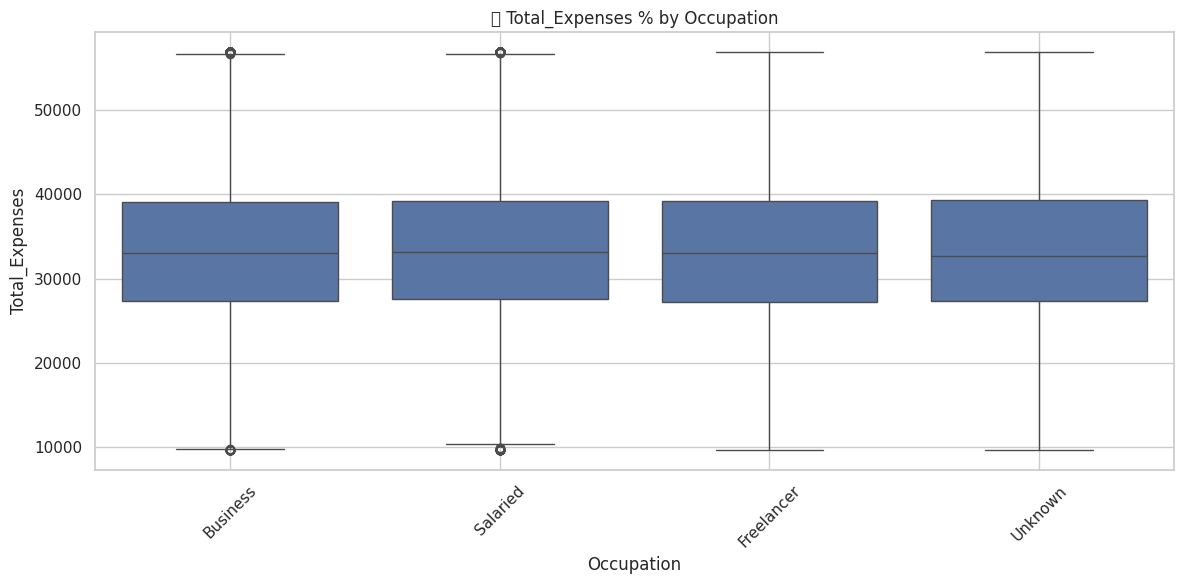

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Total_Expenses', data=df)
plt.title("📊 Total_Expenses % by Occupation")
plt.ylabel("Total_Expenses")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# VISUAL 2: Confidence Interval on Mean Desired Savings %

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


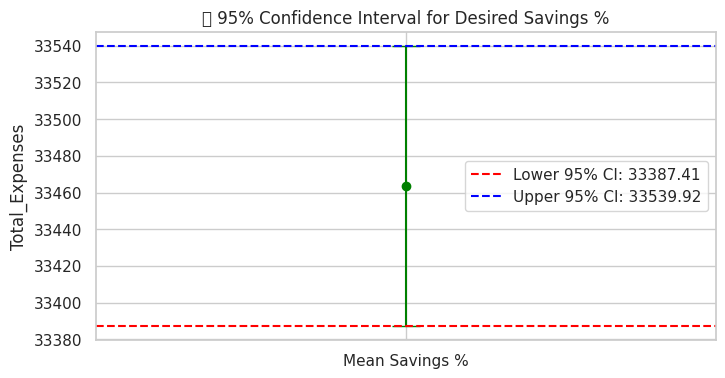

In [ ]:
import numpy as np
import scipy.stats as stats

mean = df["Total_Expenses"].mean()
std_err = stats.sem(df["Total_Expenses"].dropna())
ci = stats.t.interval(0.95, len(df["Total_Expenses"])-1, loc=mean, scale=std_err)

# Visualize
plt.figure(figsize=(8, 4))
plt.errorbar(x=["Mean Savings %"], y=[mean], yerr=[mean - ci[0]], fmt='o', capsize=10, color='green')
plt.axhline(y=ci[0], color='red', linestyle='--', label=f"Lower 95% CI: {ci[0]:.2f}")
plt.axhline(y=ci[1], color='blue', linestyle='--', label=f"Upper 95% CI: {ci[1]:.2f}")
plt.title("📏 95% Confidence Interval for Desired Savings %")
plt.ylabel("Total_Expenses")
plt.legend()
plt.grid(True)
plt.show()

# VISUAL 3: Correlation Strength vs Significance (Bubble Plot)

/tmp/ipython-input-71-197002084.py:15: RuntimeWarning: divide by zero encountered in log10
  "-log10(P)": -np.log10(p_val)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/tmp/ipython-input-71-197002084.py:29: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


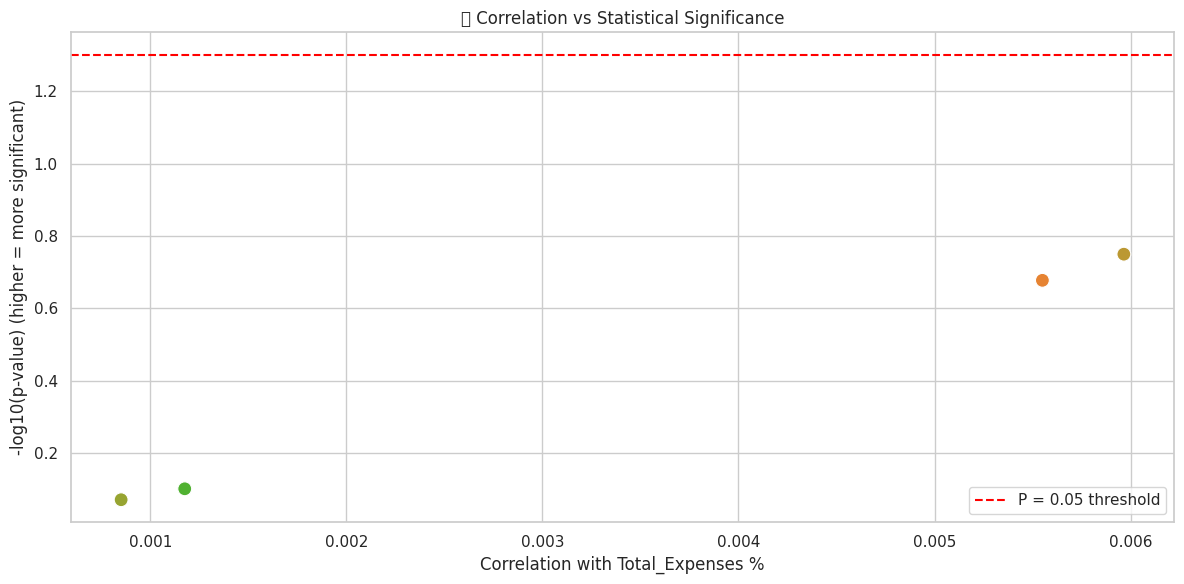

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = []

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != "Total_Expenses":
        corr, p_val = stats.pearsonr(df[col], df["Total_Expenses"])
        results.append({
            "Feature": col,
            "Correlation": corr,
            "P_Value": p_val,
            "-log10(P)": -np.log10(p_val)
        })

result_df = pd.DataFrame(results)

# Bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_df, x="Correlation", y="-log10(P)", size="-log10(P)", hue="Feature", legend=False, sizes=(100, 1000))
plt.axhline(-np.log10(0.05), color='red', linestyle='--', label="P = 0.05 threshold")
plt.title("🎯 Correlation vs Statistical Significance")
plt.xlabel("Correlation with Total_Expenses %")
plt.ylabel("-log10(p-value) (higher = more significant)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 05:- ML Models

# 01-Multi Catagorical Regression

In [ ]:
df.head()

Income  Age  Dependents Occupation  City_Tier  \
0  55960.570   46           1   Business          1   
1  48340.828   21           1   Salaried          1   
2  57772.262   25           0   Salaried          2   
3  68276.358   55           0   Salaried          1   
4  47190.160   48           1   Salaried          1   

   Desired_Savings_Percentage  Potential_Savings_Groceries  \
0                       0.188                     1278.636   
1                       0.083                      317.752   
2                       0.181                      909.169   
3                       0.069                      772.341   
4                       0.178                      720.857   

   Potential_Savings_Transport  Potential_Savings_Eating_Out  \
0                      306.490                       150.188   
1                      189.509                       391.868   
2                      448.338                       270.974   
3                      395.459                       557.189   
4                      689.550                       330.012   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                          493.637                      120.427   
1                          189.861                      486.525   
2                          455.453                      301.929   
3                          584.195                     1035.831   
4                          116.537                      393.673   

   Potential_Savings_Education  Potential_Savings_Miscellaneous  \
0                      252.222                          115.619   
1                      288.871                          275.759   
2                       97.788                           95.327   
3                      166.961                          164.061   
4                      288.256                           53.678   

   Total_Expenses  
0       33417.791  
1       34921.418  
2       35726.037  
3       40507.641  
4       32802.216

In [ ]:
Occupation_dummy = pd.get_dummies(df['Occupation'], prefix='Occ', drop_first=True).astype(int)
df = df.drop('Occupation', axis=1)
df = pd.concat([df, Occupation_dummy], axis=1)


In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
# Step 2: Train-test split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Total_Expenses', axis=1), df['Total_Expenses'], test_size=0.2, random_state=20)

## One Hot Encoding

In [ ]:
# Convert all to float64 to avoid object dtype issues
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

Income                             float64
Age                                float64
Dependents                         float64
City_Tier                          float64
Desired_Savings_Percentage         float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_Savings_Utilities        float64
Potential_Savings_Education        float64
Potential_Savings_Miscellaneous    float64
Occ_Freelancer                     float64
Occ_Salaried                       float64
Occ_Unknown                        float64
dtype: object
float64


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on training data
y_train_pred_ols = mod1.predict(x_train)

# Predict on test data (already done as y_pred)
y_test_pred_ols = y_pred  # alias for clarity

# Calculate RMSE and R²
rmse_train_ols = np.sqrt(mean_squared_error(y_train, y_train_pred_ols))
rmse_test_ols = np.sqrt(mean_squared_error(y_test, y_test_pred_ols))

r2_train_ols = r2_score(y_train, y_train_pred_ols)
r2_test_ols = r2_score(y_test, y_test_pred_ols)

# Print results
print("\n📈 OLS Model Performance:")
print(f"🔹 Train RMSE: {rmse_train_ols:.2f}")
print(f"🔹 Test  RMSE: {rmse_test_ols:.2f}")
print(f"🔹 Train R²:  {r2_train_ols:.4f}")
print(f"🔹 Test  R²:  {r2_test_ols:.4f}")


NameError: name 'mod1' is not defined

In [ ]:
print(mod1.summary())

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ RMSE (manually by taking square root)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# ✅ R² Score
r2 = r2_score(y_test, y_pred)

print(f"📊 Prediction Evaluation:")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")


# 02-DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define model and hyperparameter grid
dtr = DecisionTreeRegressor()
params = {
    'criterion': ['squared_error'],
    'max_depth': [7,8,9,10],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Grid search with R² as scoring
grid = GridSearchCV(dtr, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best model
best_dtr = grid.best_estimator_
y_train_pred = best_dtr.predict(x_train)
y_test_pred = best_dtr.predict(x_test)

# Best Paramaters
print("Best Params:", grid.best_params_)

# Evaluation
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# 03-RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RandomForest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50],
    'criterion': ['squared_error'],
    'max_depth': [10],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
}

grid_search = GridSearchCV(RandomForest, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train with best params
rfr_best = RandomForestRegressor(**grid_search.best_params_)
rfr_best.fit(x_train, y_train)

# Print R² scores
print("Train R²:", rfr_best.score(x_train, y_train))
print("Test R²:", rfr_best.score(x_test, y_test))

# 04-GRADIENT BOOSTING REGRESSOR





In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Create the model
gbr = GradientBoostingRegressor(random_state=42)

# 2. Fit the model on training data
gbr.fit(x_train, y_train)

# 3. Predict on test data
y_pred_gbr = gbr.predict(x_test)

# 4. Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print("📈 Gradient Boosting Regressor Results:")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")


In [ ]:
# 5. Predict on training data
y_train_pred = gbr.predict(x_train)

# 6. R² scores for train and test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred_gbr)

print("\n📊 R² Scores:")
print(f"🔹 Train R²: {r2_train:.4f}")
print(f"🔹 Test  R²: {r2_test:.4f}")


# End!!!